# PROBLEM OVERVIEW
ConnectTel Telecom Company faces the pressing need to address customer churn, which poses a significant threat to its business sustainability and growth.
The company's current customer retention strategies lack precision and effectiveness, resulting in the loss of valuable customers to competitors.
To overcome this challenge, ConnectTel aims to develop a robust customer churn prediction system for which you have been contacted to handle as a Data Scientist. By leveraging advanced analytics and machine learning techniques on available customer data, the company seeks to accurately forecast customer churn and implement targeted retention initiatives.
This proactive approach will enable ConnectTel to reduce customer attrition, enhance customer loyalty, and maintain a competitive edge in the highly dynamic and competitive telecommunications industry.

## Importing of Libraries

### Data Analysis Libraries

In [1]:
import pandas as pd
import numpy as np

### Libraries for Data Processing

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

### Data Pre-Processing Libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Classifiers Libraries

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Evaluation Metrics Libraries

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix

#### Importing of Warnings to avoid unneccesary warning signs

In [6]:
import warnings
warnings.filterwarnings("ignore")

## Importing of Data

In [7]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Dictionary

1. CustomerID: A unique identifier assigned to each telecom customer, enabling tracking and identification of individual customers.
2. Gender: The gender of the customer, which can be categorized as male, or female. This information helps in analyzing gender-based trends in customer churn.
3. SeniorCitizen: A binary indicator that identifies whether the customer is a senior citizen or not. This attribute helps in understanding if there are any specific churn patterns among senior customers.
4. Partner: Indicates whether the customer has a partner or not. This attribute helps in evaluating the impact of having a partner on churn behavior.
5. Dependents: Indicates whether the customer has dependents or not. This attribute helps in assessing the influence of having dependents on customer churn.
6. Tenure: The duration for which the customer has been subscribed to the telecom service. It represents the loyalty or longevity of the customer’s relationship with the company and is a significant predictor of churn.
7. PhoneService: Indicates whether the customer has a phone service or not. This attribute helps in understanding the impact of phone service on churn.
8. MultipleLines: Indicates whether the customer has multiple lines or not. This attribute helps in analyzing the effect of having multiple lines on customer churn.
9. InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic, or no internet service. It helps in evaluating the relationship between internet service and churn.
10. OnlineSecurity: Indicates whether the customer has online security services or not. This attribute helps in analyzing the impact of online security on customer churn.
11. OnlineBackup: Indicates whether the customer has online backup services or not. This attribute helps in evaluating the impact of online backup on churn behavior.
12. DeviceProtection: Indicates whether the customer has device protection services or not. This attribute helps in understanding the influence of device protection on churn.
13. TechSupport: Indicates whether the customer has technical support services or not. This attribute helps in assessing the impact of tech support on churn behavior.
14. StreamingTV: Indicates whether the customer has streaming TV services or not. This attribute helps in evaluating the impact of streaming TV on customer churn.
15. StreamingMovies: Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence of streaming movies on churn behavior.
16. Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract. It is a crucial factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.
17. PaperlessBilling: Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of paperless billing on customer churn.
18. PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards. This attribute helps in evaluating the impact of payment methods on churn.
19. MonthlyCharges: The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly charges and churn behavior.
20. TotalCharges: The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the customer and may have an impact on churn.
21. Churn: The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to predict in telecom customer churn analysis.

## Making a Copy of the Data

In [8]:
c_data = data.copy()

In [9]:
c_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
c_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Data Cleaning

### Checking for Missing Data and Visualization

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

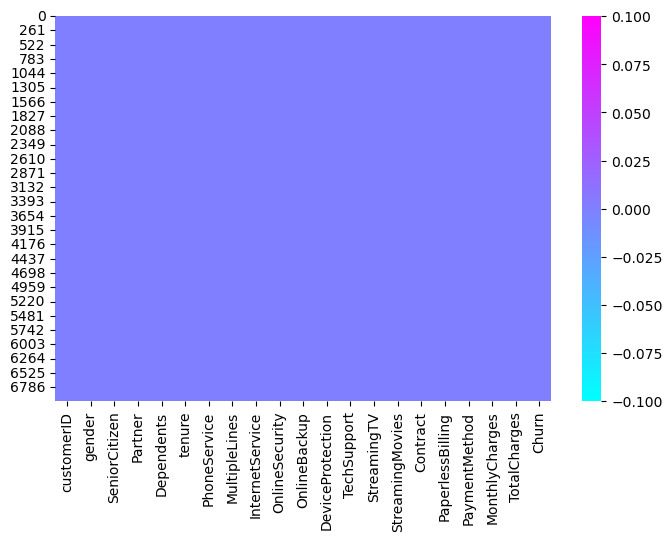

In [11]:
print(c_data.isnull().sum())

plt.figure(figsize = (8,5))
sns.heatmap(c_data.isnull(), cbar=True, cmap="cool")

In [12]:
c_data[c_data.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Understanding the Data

In [13]:
c_data.shape

(7043, 21)

In [14]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
c_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
c_data.describe(exclude=["int","float"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


# Exploratory Data Analysis

In [17]:
c_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
#sns.countplot(x="gender",data=c_data)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


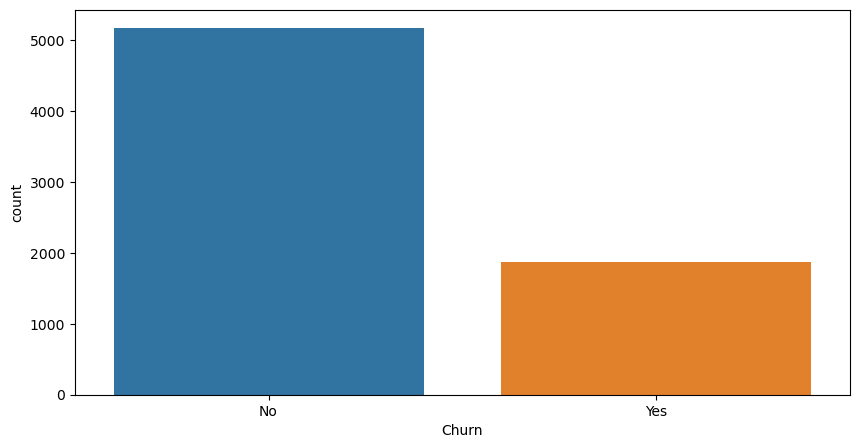

In [19]:
print(c_data["Churn"].value_counts())
fig, axs = plt.subplots(figsize=(10,5))
sns.countplot(x=c_data["Churn"]);


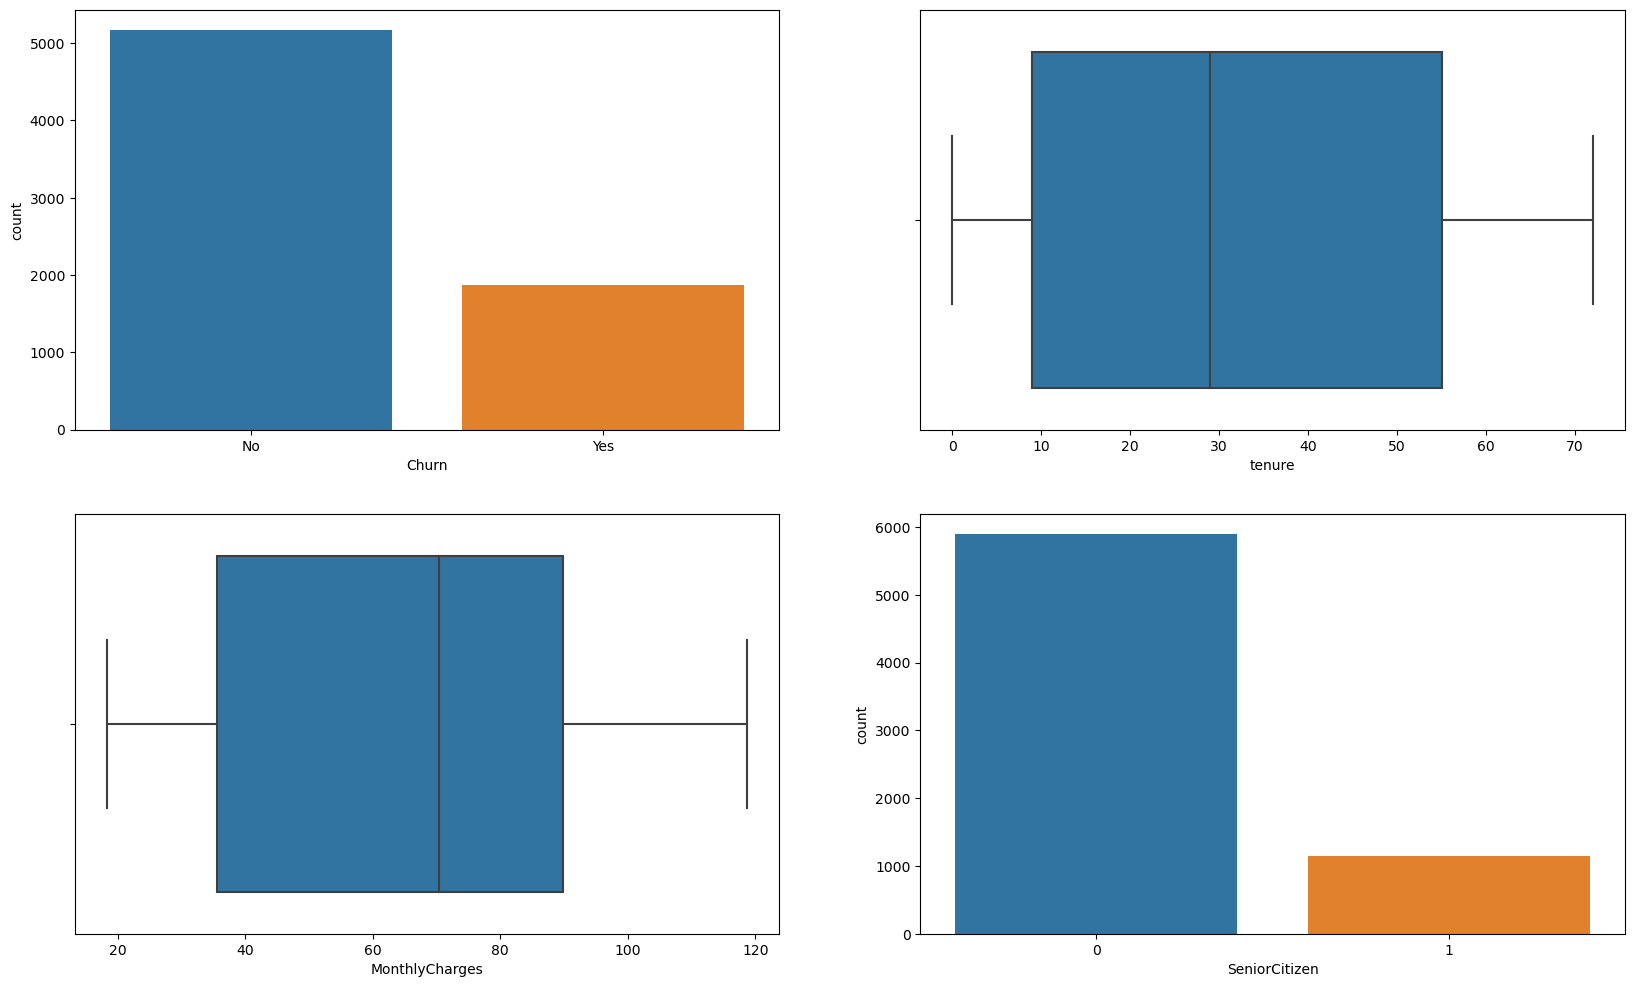

In [20]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x=c_data["Churn"], ax = axs[0,0])
plt2 = sns.boxplot(x=c_data["tenure"], ax = axs[0,1])
plt3 = sns.boxplot(x=c_data["MonthlyCharges"], ax = axs[1,0])
plt4 = sns.countplot(x=c_data["SeniorCitizen"], ax = axs[1,1])

gender
Male      3555
Female    3488
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


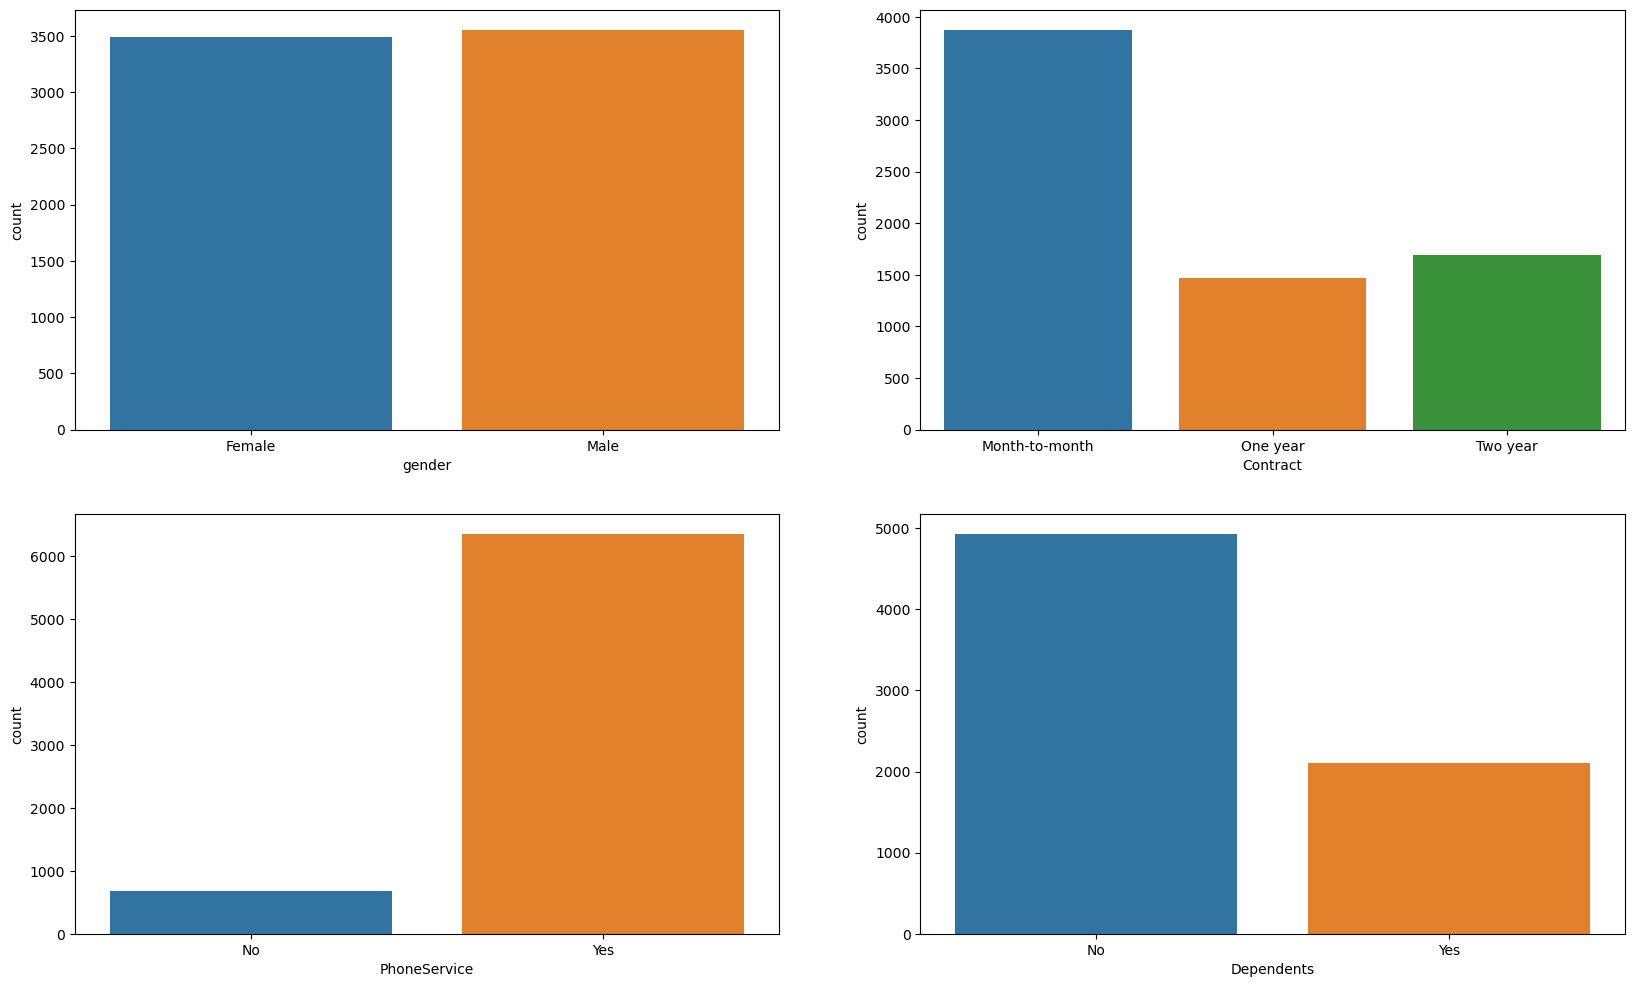

In [21]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x=c_data["gender"], ax = axs[0,0])
plt2 = sns.countplot(x=c_data["Contract"], ax = axs[0,1])
plt3 = sns.countplot(x=c_data["PhoneService"], ax = axs[1,0])
plt4 = sns.countplot(x=c_data["Dependents"], ax = axs[1,1])

print(c_data["gender"].value_counts())
print(c_data["Contract"].value_counts())
print(c_data["PhoneService"].value_counts())
print(c_data["Dependents"].value_counts())

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


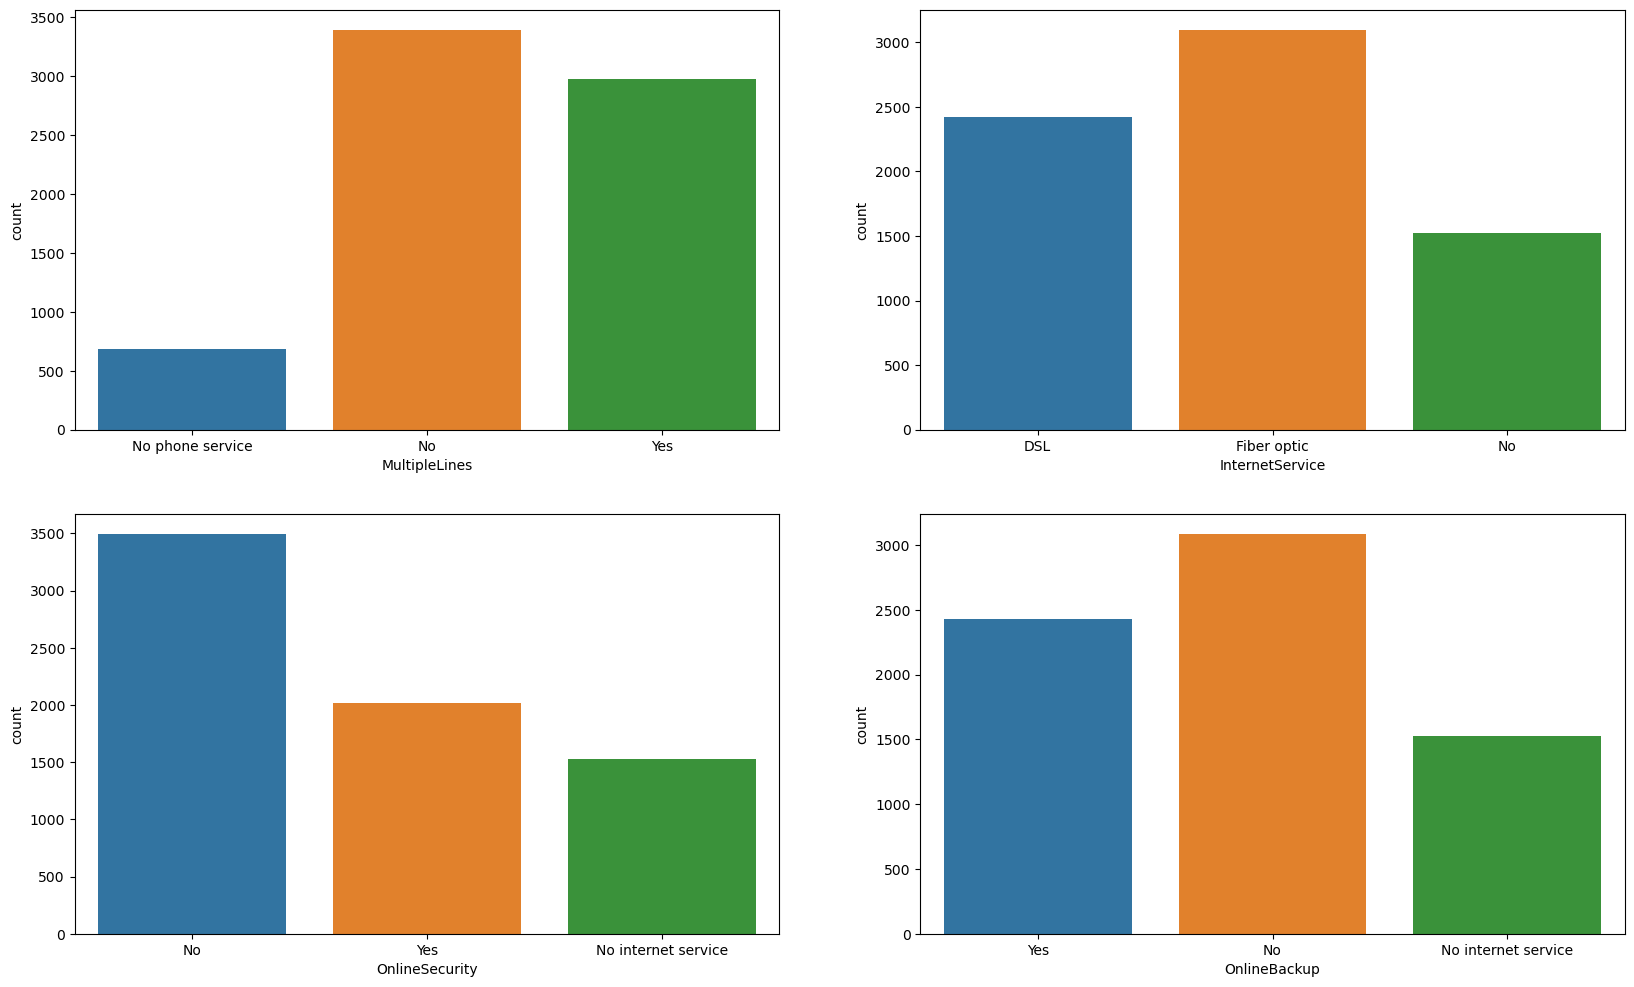

In [22]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x=c_data["MultipleLines"], ax = axs[0,0])
plt2 = sns.countplot(x=c_data["InternetService"], ax = axs[0,1])
plt3 = sns.countplot(x=c_data["OnlineSecurity"], ax = axs[1,0])
plt4 = sns.countplot(x=c_data["OnlineBackup"], ax = axs[1,1])

print(c_data["MultipleLines"].value_counts())
print(c_data["InternetService"].value_counts())
print(c_data["OnlineSecurity"].value_counts())
print(c_data["OnlineBackup"].value_counts())

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


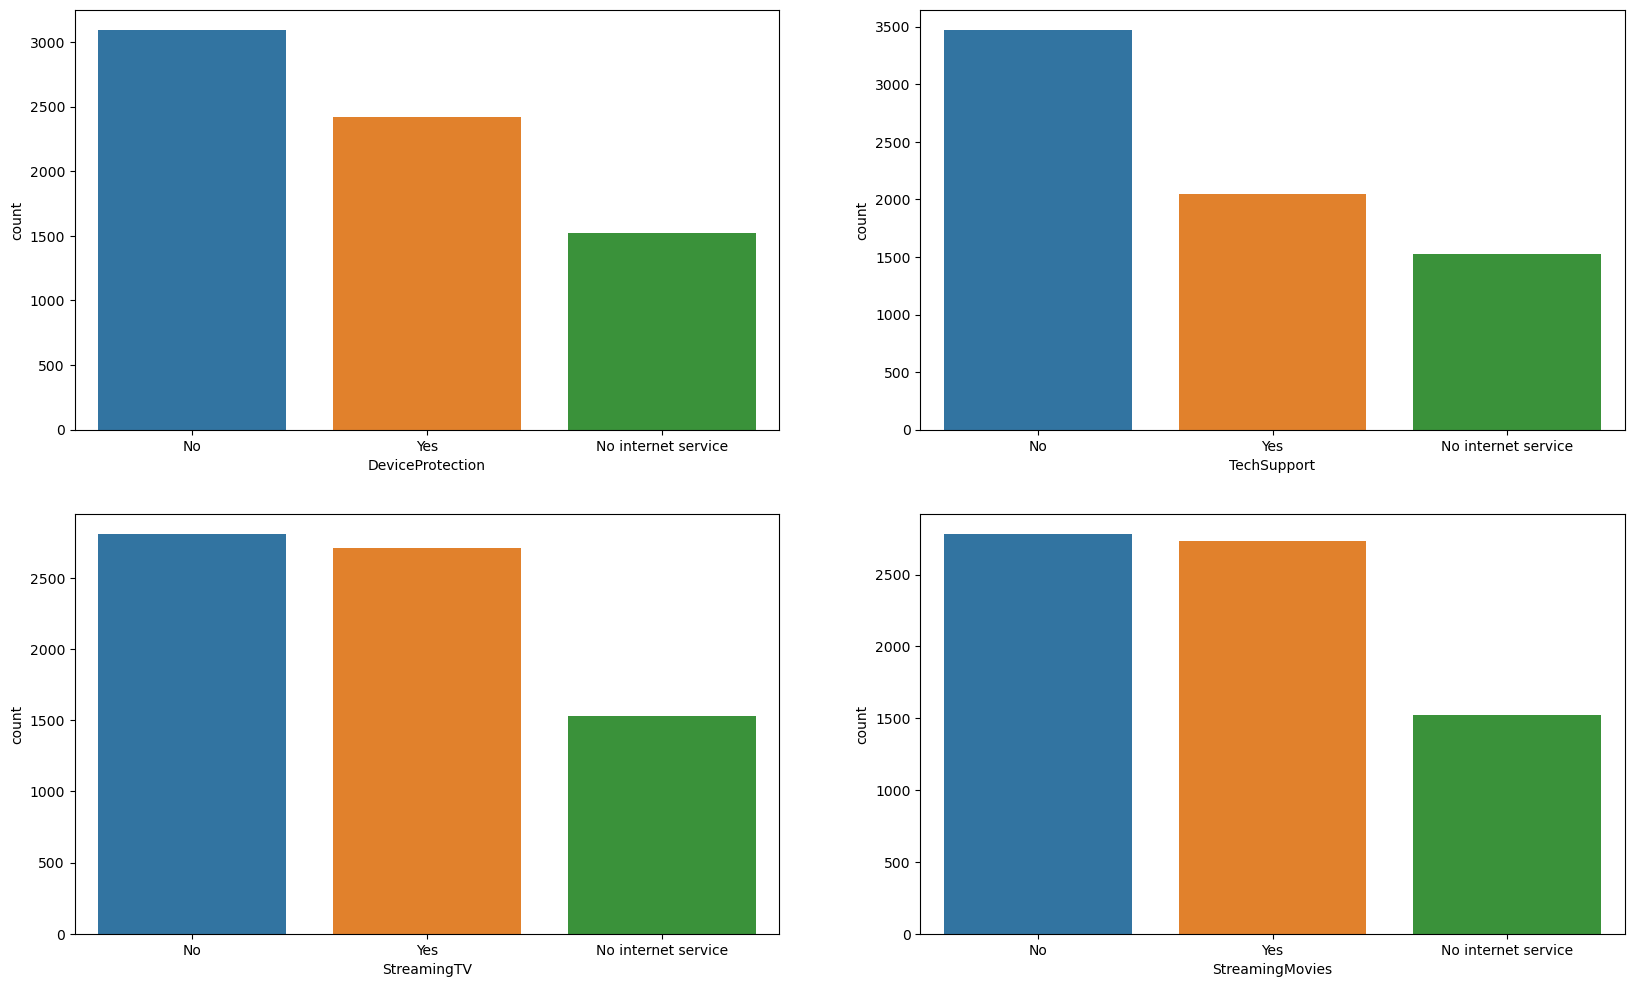

In [23]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x="DeviceProtection", data=c_data, ax = axs[0,0])
plt2 = sns.countplot(x="TechSupport", data= c_data, ax = axs[0,1])
plt3 = sns.countplot(x="StreamingTV", data= c_data, ax = axs[1,0])
plt4 = sns.countplot(x="StreamingMovies", data= c_data, ax = axs[1,1])

print(c_data["DeviceProtection"].value_counts())
print(c_data["TechSupport"].value_counts())
print(c_data["StreamingTV"].value_counts())
print(c_data["StreamingMovies"].value_counts())

Partner
No     3641
Yes    3402
Name: count, dtype: int64


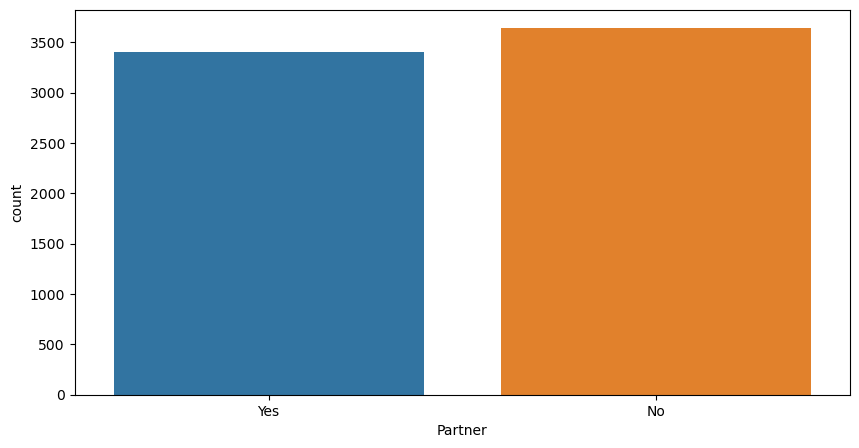

In [24]:
fig, axs = plt.subplots(figsize=(10,5))
sns.countplot(x="Partner", data= c_data);

print(c_data["Partner"].value_counts())

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


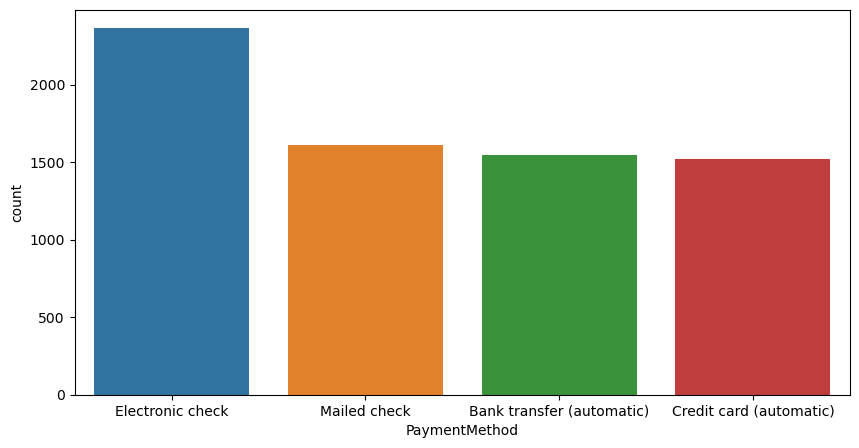

In [25]:
fig, axs = plt.subplots(figsize=(10,5))
sns.countplot(x="PaymentMethod", data= c_data);

print(c_data["PaymentMethod"].value_counts())

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


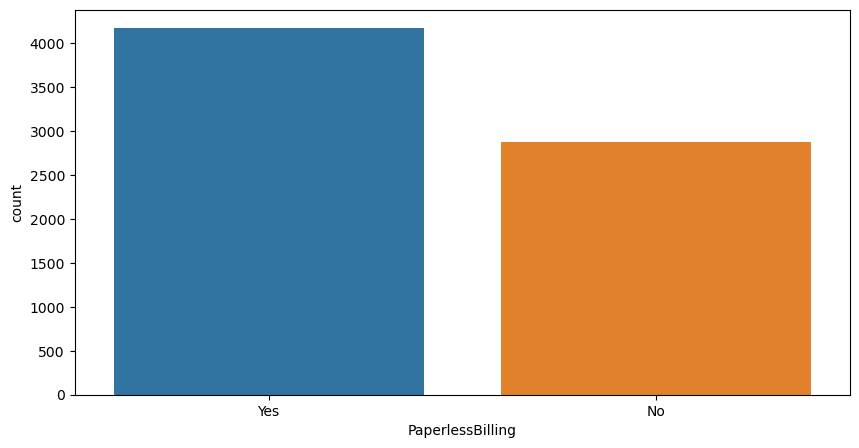

In [26]:
fig, axs = plt.subplots(figsize=(10,5))
sns.countplot(x="PaperlessBilling", data= c_data);

print(c_data["PaperlessBilling"].value_counts())

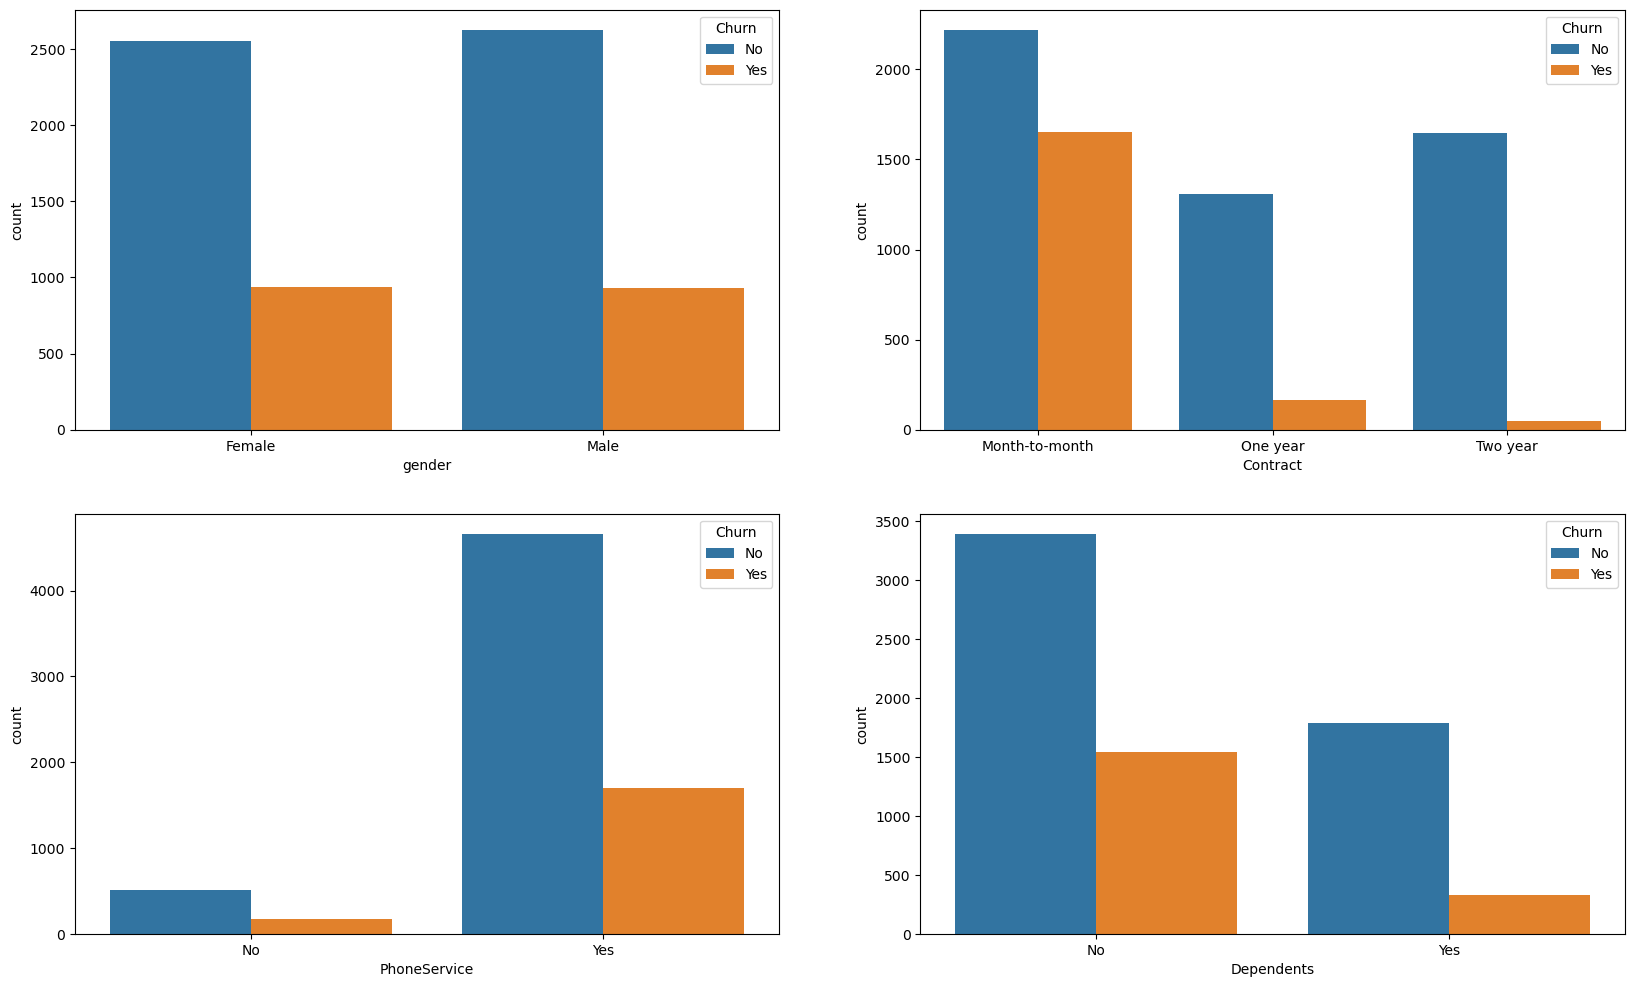

In [27]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x="gender", data= c_data, hue="Churn", ax = axs[0,0])
plt2 = sns.countplot(x="Contract", data= c_data, hue="Churn", ax = axs[0,1])
plt3 = sns.countplot(x="PhoneService", data= c_data, hue="Churn", ax = axs[1,0])
plt4 = sns.countplot(x="Dependents", data= c_data, hue="Churn", ax = axs[1,1])

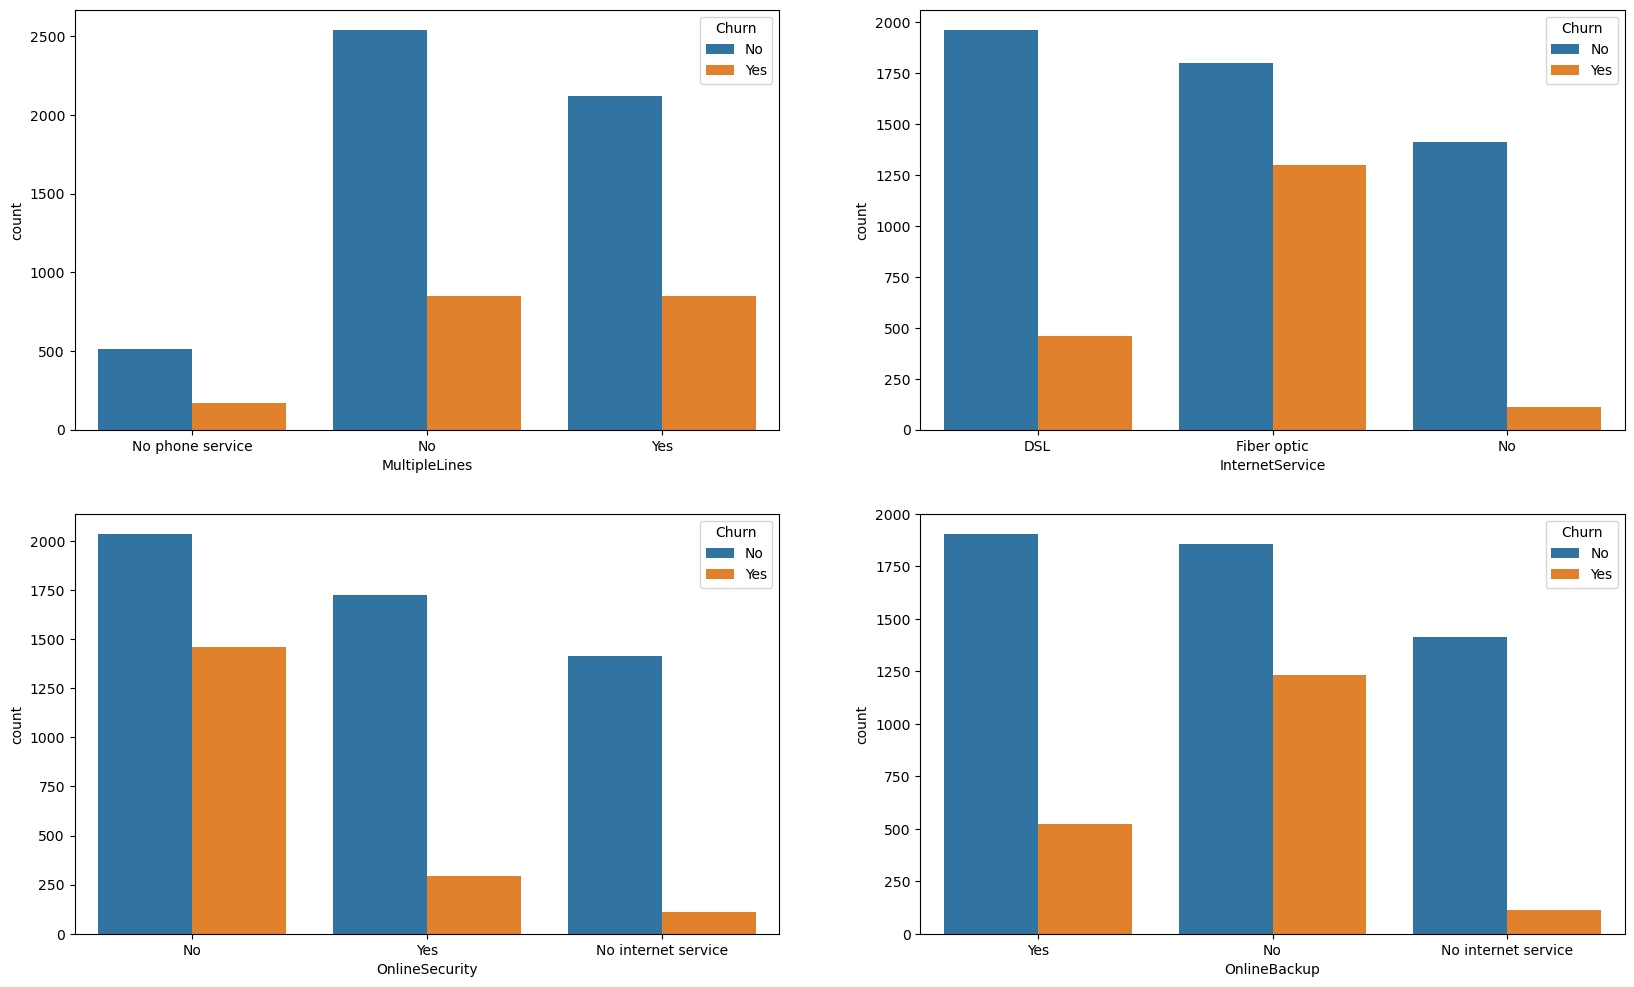

In [28]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x="MultipleLines", data= c_data, hue="Churn", ax = axs[0,0])
plt2 = sns.countplot(x="InternetService", data= c_data, hue="Churn", ax = axs[0,1])
plt3 = sns.countplot(x="OnlineSecurity", data= c_data, hue="Churn", ax = axs[1,0])
plt4 = sns.countplot(x="OnlineBackup", data= c_data, hue="Churn", ax = axs[1,1])

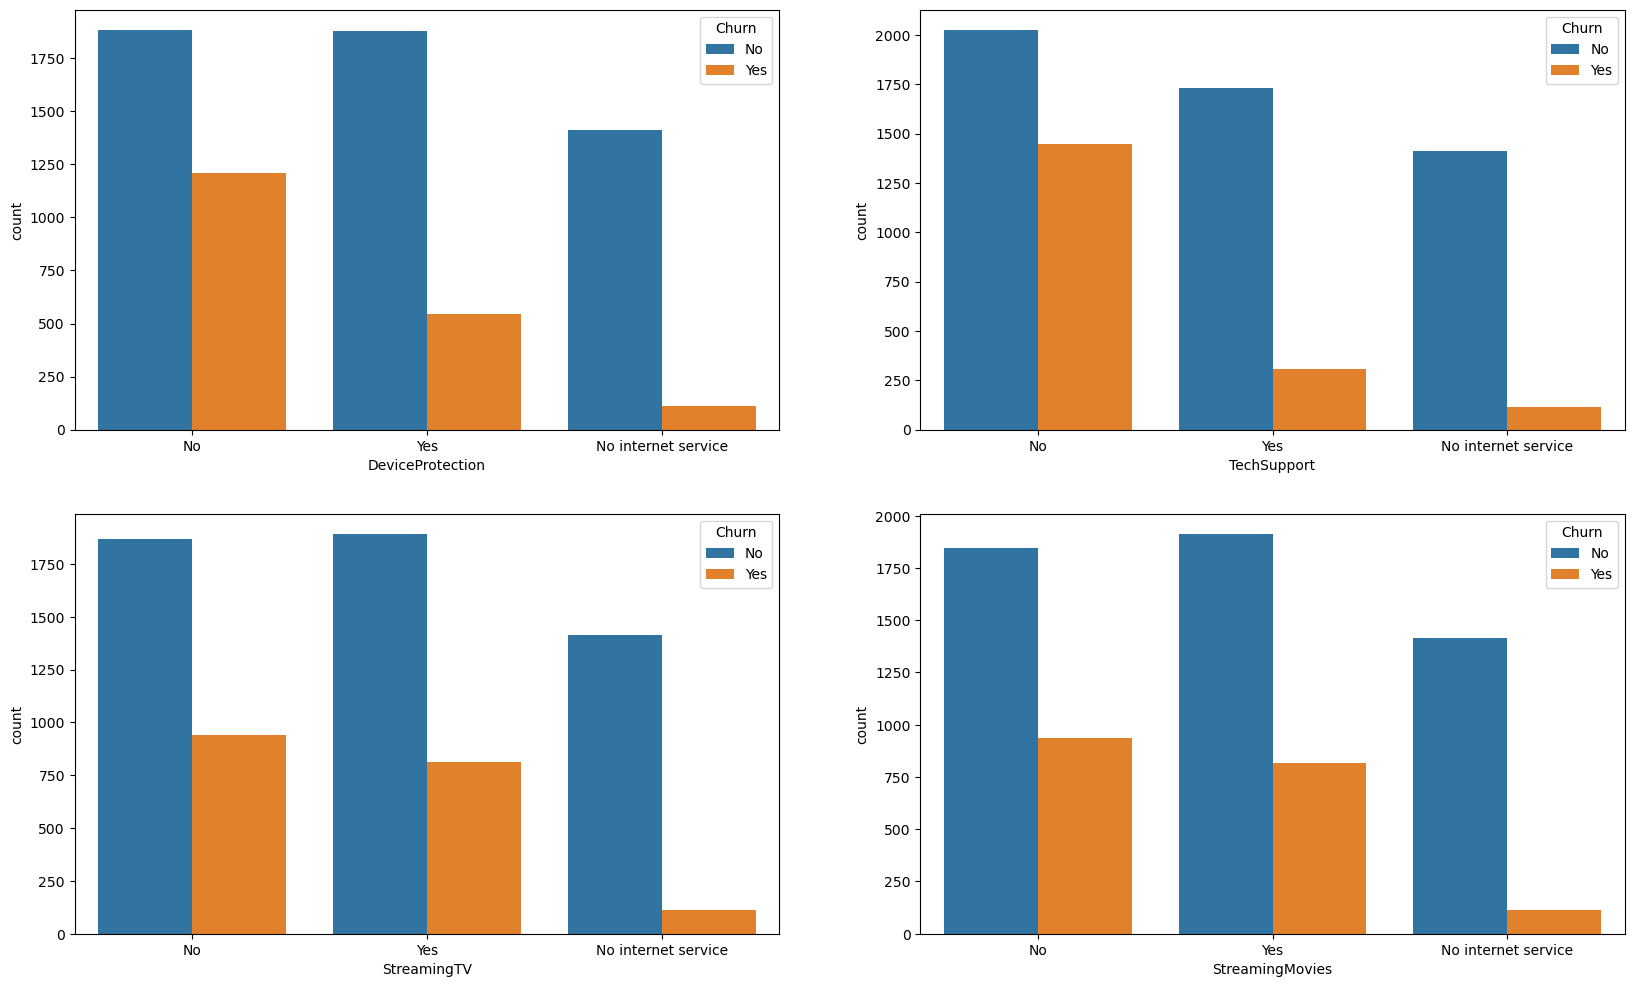

In [29]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x="DeviceProtection", data= c_data, hue="Churn", ax = axs[0,0])
plt2 = sns.countplot(x="TechSupport", data= c_data, hue="Churn", ax = axs[0,1])
plt3 = sns.countplot(x="StreamingTV", data= c_data, hue="Churn", ax = axs[1,0])
plt4 = sns.countplot(x="StreamingMovies", data= c_data, hue="Churn", ax = axs[1,1])

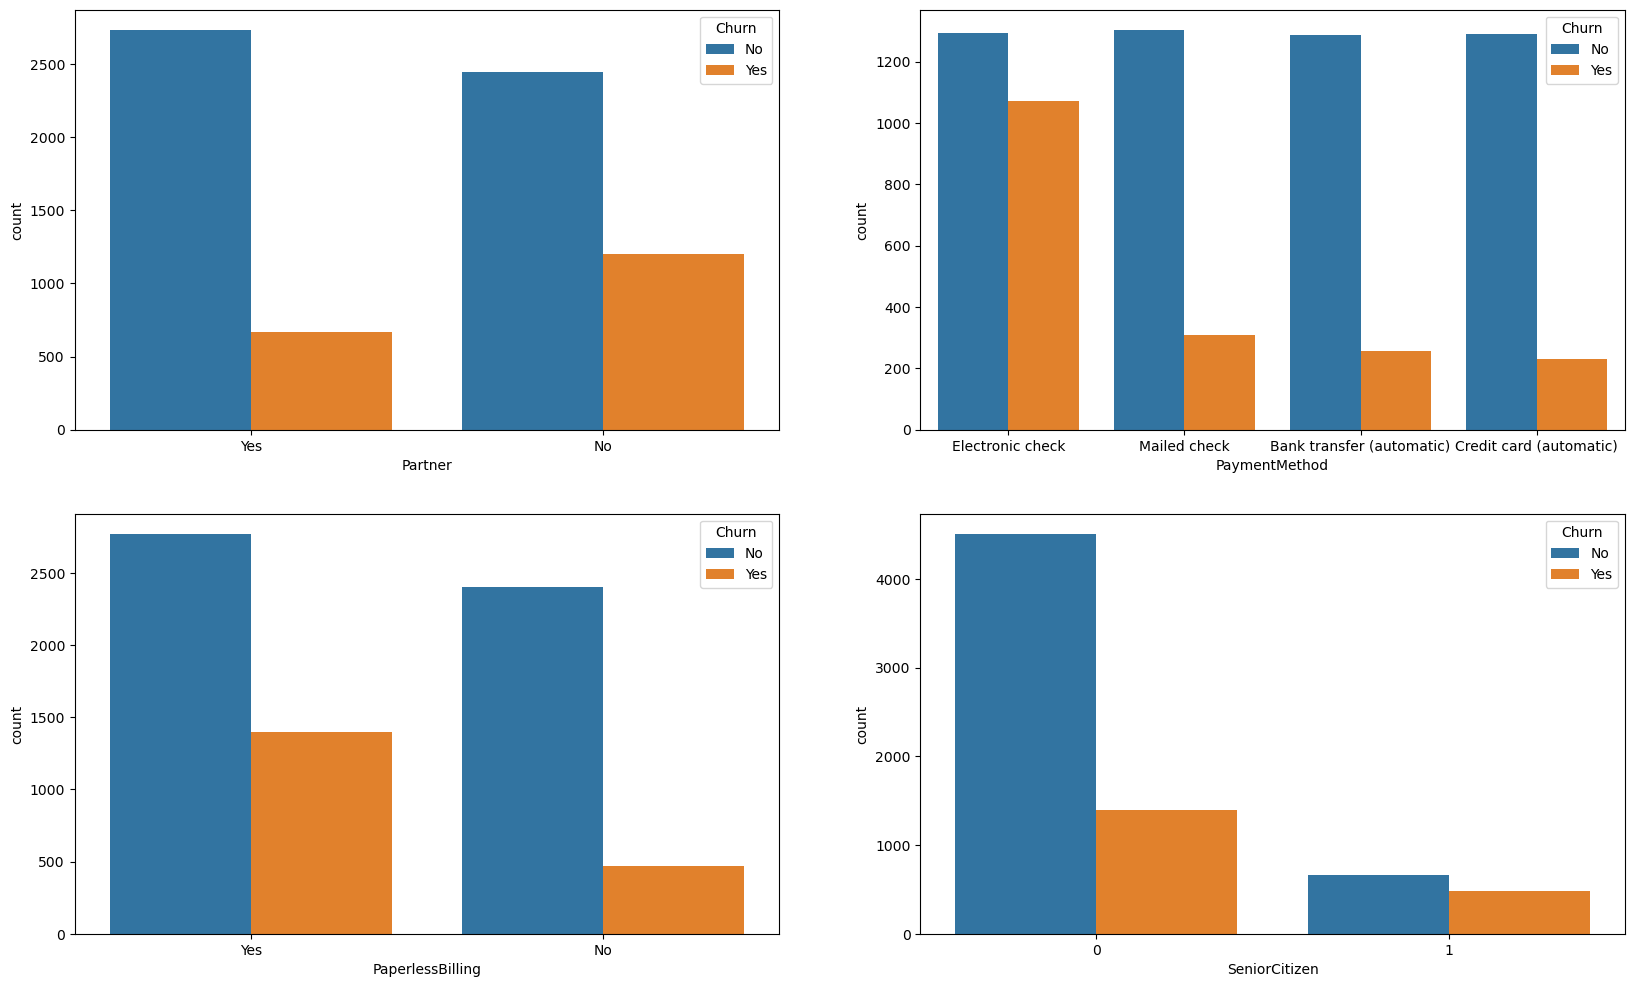

In [30]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x="Partner", data= c_data, hue="Churn", ax = axs[0,0])
plt2 = sns.countplot(x="PaymentMethod", data= c_data, hue="Churn", ax = axs[0,1])
plt3 = sns.countplot(x="PaperlessBilling", data= c_data, hue="Churn", ax = axs[1,0])
plt4 = sns.countplot(x="SeniorCitizen", data= c_data, hue="Churn", ax = axs[1,1])

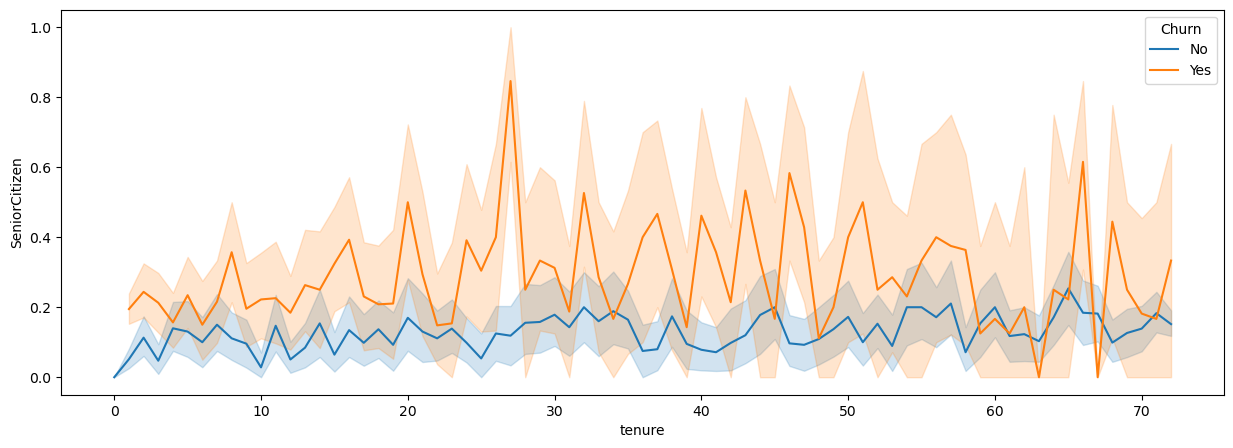

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(x="tenure", y="SeniorCitizen", data=c_data, hue="Churn");

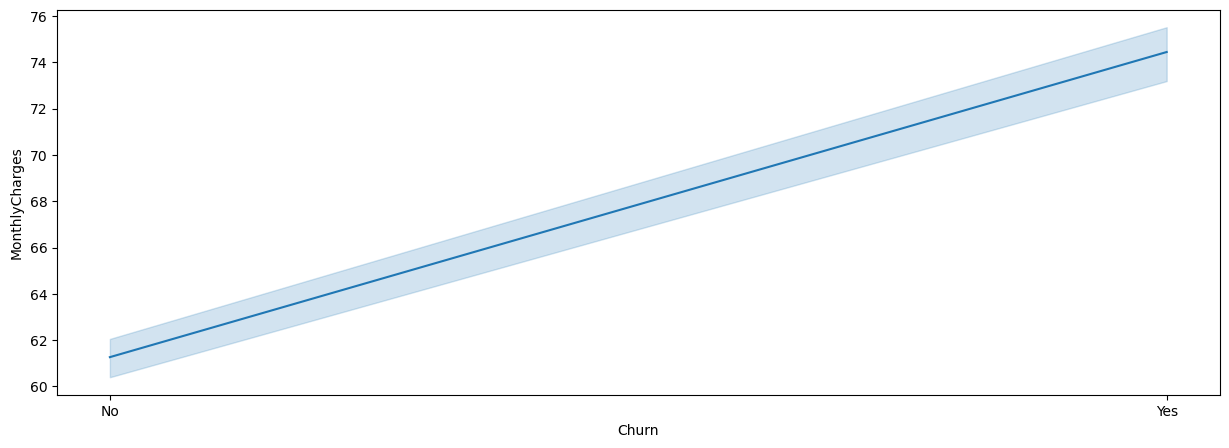

In [32]:
plt.figure(figsize=(15,5))
sns.lineplot(y="MonthlyCharges", x="Churn", data= c_data);

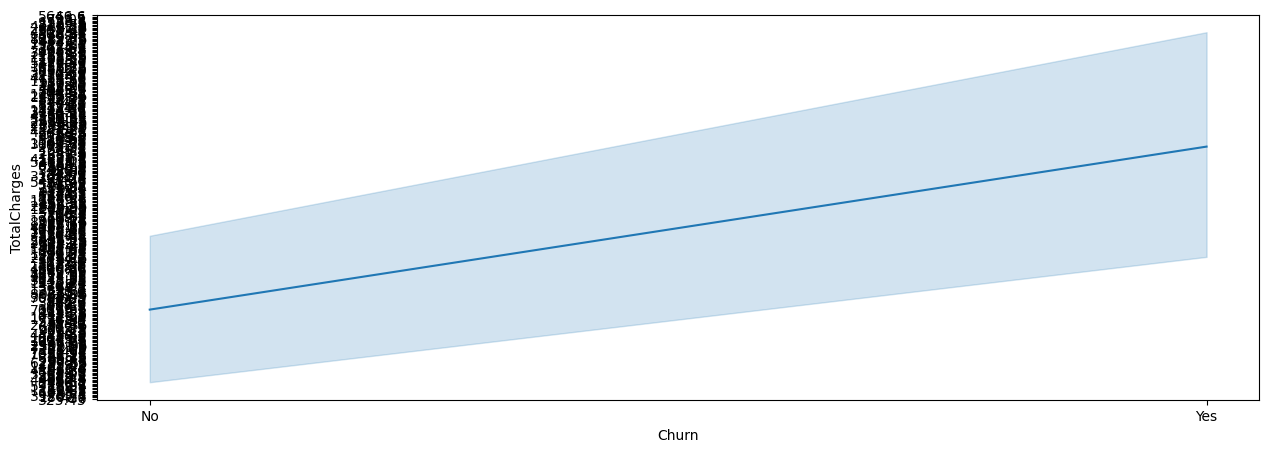

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(y="TotalCharges", x="Churn", data= c_data);

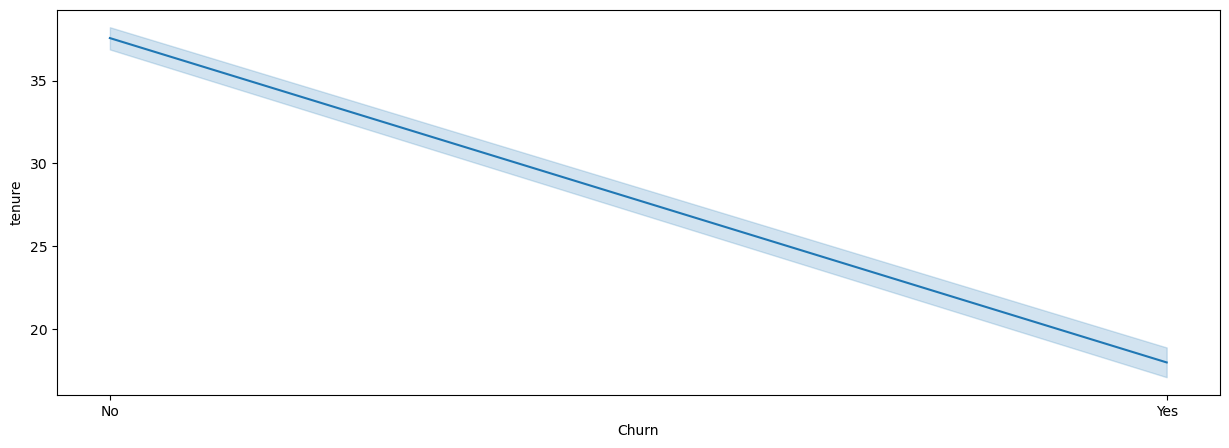

In [34]:
plt.figure(figsize=(15,5))
sns.lineplot(y="tenure", x="Churn", data= c_data);

In [35]:
c_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
c_data.describe(exclude=["int","float"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


<Axes: xlabel='tenure', ylabel='SeniorCitizen'>

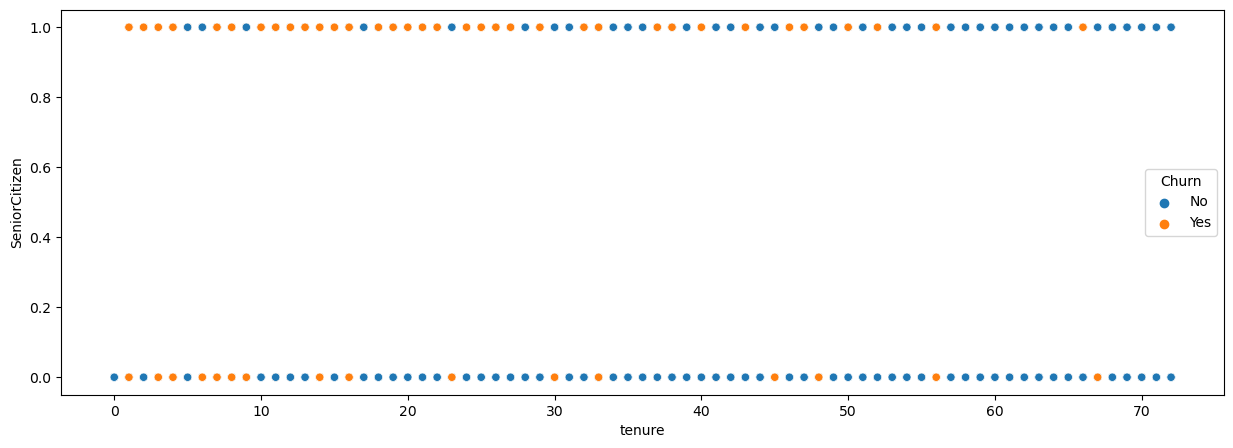

In [37]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="tenure", y="SeniorCitizen", data=c_data, hue="Churn")

# Data Pre-Processing

In [38]:
c_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Feature Engineering

In [39]:
d_data = c_data[["gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"]]

label = c_data[["Churn"]]

In [40]:
d_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [41]:
label.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [42]:
def Multi(MultipleLines):
    if MultipleLines == "Yes":
        return "Yes"
    else:
        return "No" 
d_data["Multiple_Line"] = d_data["MultipleLines"].apply(Multi)


def Int(InternetService):
    if InternetService == "No":
        return "No"
    else:
        return "Yes"  
d_data["Internet_Service"] = d_data["InternetService"].apply(Int)


def Online(OnlineSecurity):
    if OnlineSecurity == "Yes":
        return "Yes"
    else:
        return "No"
d_data["Online_Security"] = d_data["OnlineSecurity"].apply(Online)


def O(OnlineBackup):
    if OnlineBackup == "Yes":
        return "Yes"
    else:
        return "No"    
d_data["Online_Backup"] = d_data["OnlineBackup"].apply(O)


def OO(DeviceProtection):
    if DeviceProtection == "Yes":
        return "Yes"
    else:
        return "No"    
d_data["Device_Protection"] = d_data["DeviceProtection"].apply(OO)


def OOO(TechSupport):
    if TechSupport == "Yes":
        return "Yes"
    else:
        return "No"    
d_data["Tech_Support"] = d_data["TechSupport"].apply(OOO)


def OOOO(StreamingTV):
    if StreamingTV == "Yes":
        return "Yes"
    else:
        return "No"    
d_data["Streaming_TV"] = d_data["StreamingTV"].apply(OOOO)


def OOOOO(StreamingMovies):
    if StreamingMovies == "Yes":
        return "Yes"
    else:
        return "No"    
d_data["Streaming_Movies"] = d_data["StreamingMovies"].apply(OOOOO)


d_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Multiple_Line,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,29.85,29.85,No,Yes,No,Yes,No,No,No,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,56.95,1889.5,No,Yes,Yes,No,Yes,No,No,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,53.85,108.15,No,Yes,Yes,Yes,No,No,No,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,42.30,1840.75,No,Yes,Yes,No,Yes,Yes,No,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,70.70,151.65,No,Yes,No,No,No,No,No,No


In [43]:
d_data.describe(exclude=["int","float"])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod,TotalCharges,Multiple_Line,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,...,4,6531,2,2,2,2,2,2,2,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,...,Electronic check,,No,Yes,No,No,No,No,No,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,...,2365,11,4072,5517,5024,4614,4621,4999,4336,4311


In [44]:
d_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Multiple_Line', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies'],
      dtype='object')

In [45]:
d_data = d_data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling','PaymentMethod','MonthlyCharges', 'TotalCharges', 'Contract', 'Multiple_Line', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies']]

In [46]:
d_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Contract,Multiple_Line,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies
0,Female,0,Yes,No,1,No,Yes,Electronic check,29.85,29.85,Month-to-month,No,Yes,No,Yes,No,No,No,No
1,Male,0,No,No,34,Yes,No,Mailed check,56.95,1889.5,One year,No,Yes,Yes,No,Yes,No,No,No
2,Male,0,No,No,2,Yes,Yes,Mailed check,53.85,108.15,Month-to-month,No,Yes,Yes,Yes,No,No,No,No
3,Male,0,No,No,45,No,No,Bank transfer (automatic),42.30,1840.75,One year,No,Yes,Yes,No,Yes,Yes,No,No
4,Female,0,No,No,2,Yes,Yes,Electronic check,70.70,151.65,Month-to-month,No,Yes,No,No,No,No,No,No


In [47]:
min_value = d_data["MonthlyCharges"].min()
min_value

18.25

In [48]:
max_value = d_data["MonthlyCharges"].max()
max_value

118.75

In [49]:
min_value = d_data["tenure"].min()
min_value

0

In [50]:
max_value = d_data["tenure"].max()
max_value

72

In [51]:
min_value = d_data["TotalCharges"].min()
min_value

' '

In [52]:
max_value = d_data["TotalCharges"].max()
max_value

'999.9'

### Encoding the Categorical Variables

In [53]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for c in d_data.columns[0:]:
    if(d_data[c].dtype=="object"):
        d_data[c] = encoder.fit_transform(d_data[c])
    else:
        d_data[c] = d_data[c]
        
d_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Contract,Multiple_Line,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies
0,0,0,1,0,1,0,1,2,29.85,2505,0,0,1,0,1,0,0,0,0
1,1,0,0,0,34,1,0,3,56.95,1466,1,0,1,1,0,1,0,0,0
2,1,0,0,0,2,1,1,3,53.85,157,0,0,1,1,1,0,0,0,0
3,1,0,0,0,45,0,0,0,42.30,1400,1,0,1,1,0,1,1,0,0
4,0,0,0,0,2,1,1,2,70.70,925,0,0,1,0,0,0,0,0,0


In [54]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for c in label.columns[0:]:
    if(label[c].dtype=="object"):
        label[c] = encoder.fit_transform(label[c])
    else:
        label[c] = label[c]
        
label.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [55]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   int32  
 1   SeniorCitizen      7043 non-null   int64  
 2   Partner            7043 non-null   int32  
 3   Dependents         7043 non-null   int32  
 4   tenure             7043 non-null   int64  
 5   PhoneService       7043 non-null   int32  
 6   PaperlessBilling   7043 non-null   int32  
 7   PaymentMethod      7043 non-null   int32  
 8   MonthlyCharges     7043 non-null   float64
 9   TotalCharges       7043 non-null   int32  
 10  Contract           7043 non-null   int32  
 11  Multiple_Line      7043 non-null   int32  
 12  Internet_Service   7043 non-null   int32  
 13  Online_Security    7043 non-null   int32  
 14  Online_Backup      7043 non-null   int32  
 15  Device_Protection  7043 non-null   int32  
 16  Tech_Support       7043 

### Scaling

In [56]:
scaler = MinMaxScaler()

d_data["Tenure_"] = scaler.fit_transform(d_data["tenure"].values.reshape(-1, 1))
d_data["Monthly Charges"] = scaler. fit_transform(d_data[["MonthlyCharges"]].values.reshape(-1, 1))
d_data["Total Charges"] = scaler. fit_transform(d_data[["TotalCharges"]].values.reshape(-1, 1))


d_data.drop(["tenure", "MonthlyCharges", "TotalCharges"], axis=1, inplace=True)
d_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,PaymentMethod,Contract,Multiple_Line,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Tenure_,Monthly Charges,Total Charges
0,0,0,1,0,0,1,2,0,0,1,0,1,0,0,0,0,0.013889,0.115423,0.383614
1,1,0,0,0,1,0,3,1,0,1,1,0,1,0,0,0,0.472222,0.385075,0.224502
2,1,0,0,0,1,1,3,0,0,1,1,1,0,0,0,0,0.027778,0.354229,0.024043
3,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0.625000,0.239303,0.214395
4,0,0,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0.027778,0.521891,0.141654


[0.00768597 0.01743447 0.01817267 0.01935743 0.01956292 0.01962474
 0.02016302 0.02058411 0.02198236 0.02324019 0.02372385 0.02498151
 0.02653381 0.02849878 0.05430377 0.09322275 0.17353762 0.18473472
 0.20265531]


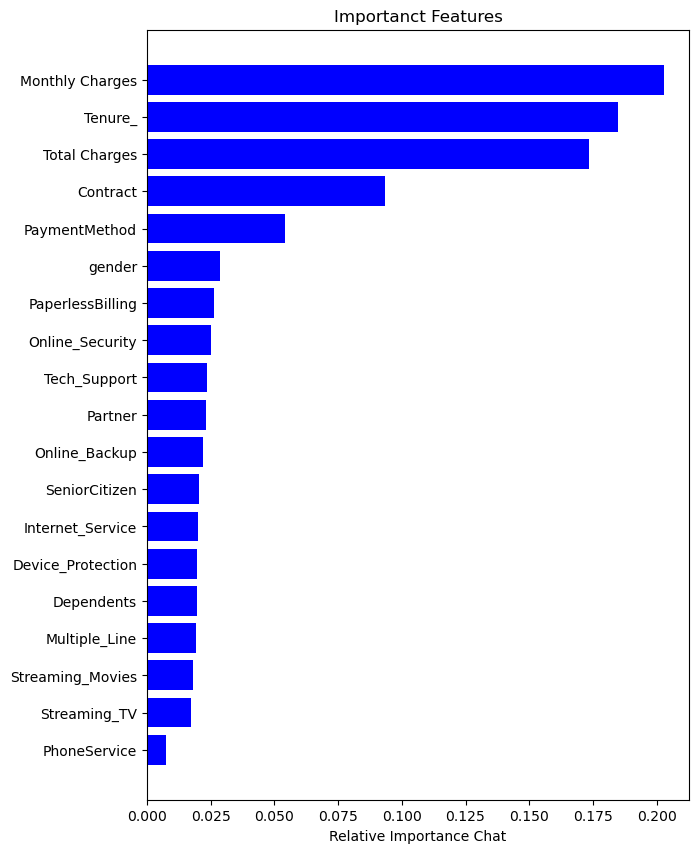

In [57]:
rfc = RandomForestClassifier()
rfc.fit(d_data, label)
name_f = list(d_data.columns)
importances = rfc.feature_importances_
indices = np.argsort(importances)

print(importances[indices])
plt.figure(figsize=(7, 10))
plt.barh(range(len(indices)), importances[indices], color="Blue")
plt.yticks(range(len(indices)), [name_f[i] for i in indices])
plt.xlabel("Relative Importance Chat")
plt.title("Importanct Features")
plt.show()


Online_Security
0    5024
1    2019
Name: count, dtype: int64
Tech_Support
0    4999
1    2044
Name: count, dtype: int64
Partner
0    3641
1    3402
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


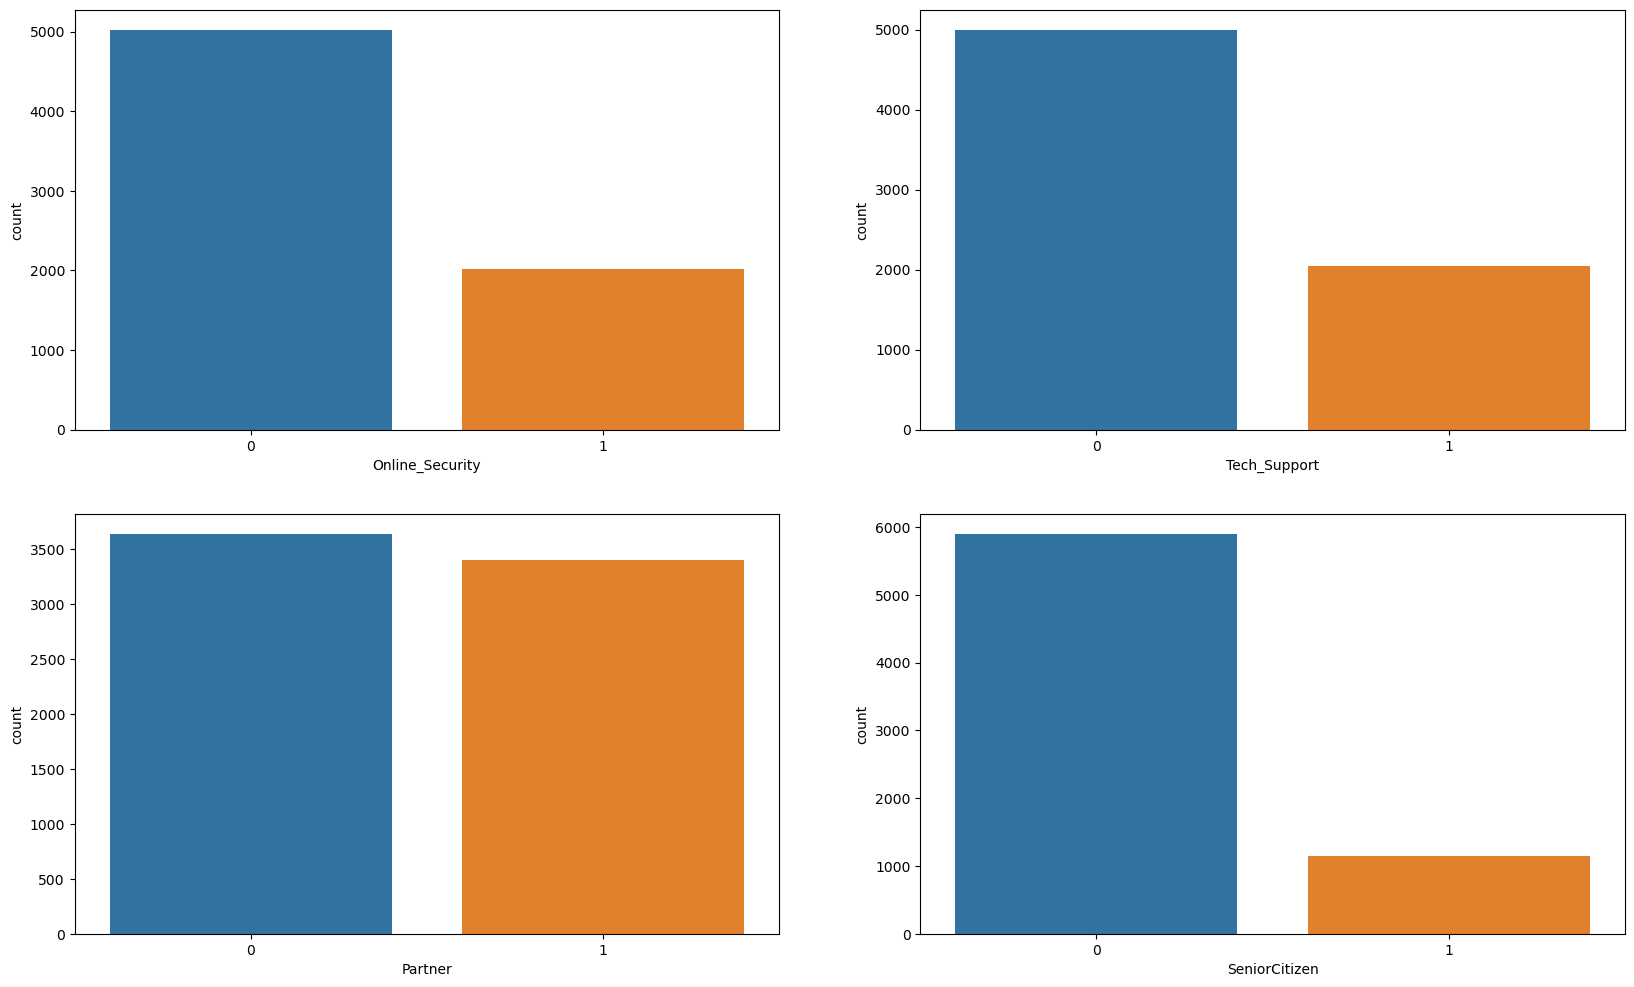

In [58]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x=d_data["Online_Security"], ax = axs[0,0])
plt2 = sns.countplot(x=d_data["Tech_Support"], ax = axs[0,1])
plt3 = sns.countplot(x=d_data["Partner"], ax = axs[1,0])
plt4 = sns.countplot(x=d_data["SeniorCitizen"], ax = axs[1,1])

print(d_data["Online_Security"].value_counts())
print(d_data["Tech_Support"].value_counts())
print(d_data["Partner"].value_counts())
print(d_data["SeniorCitizen"].value_counts())

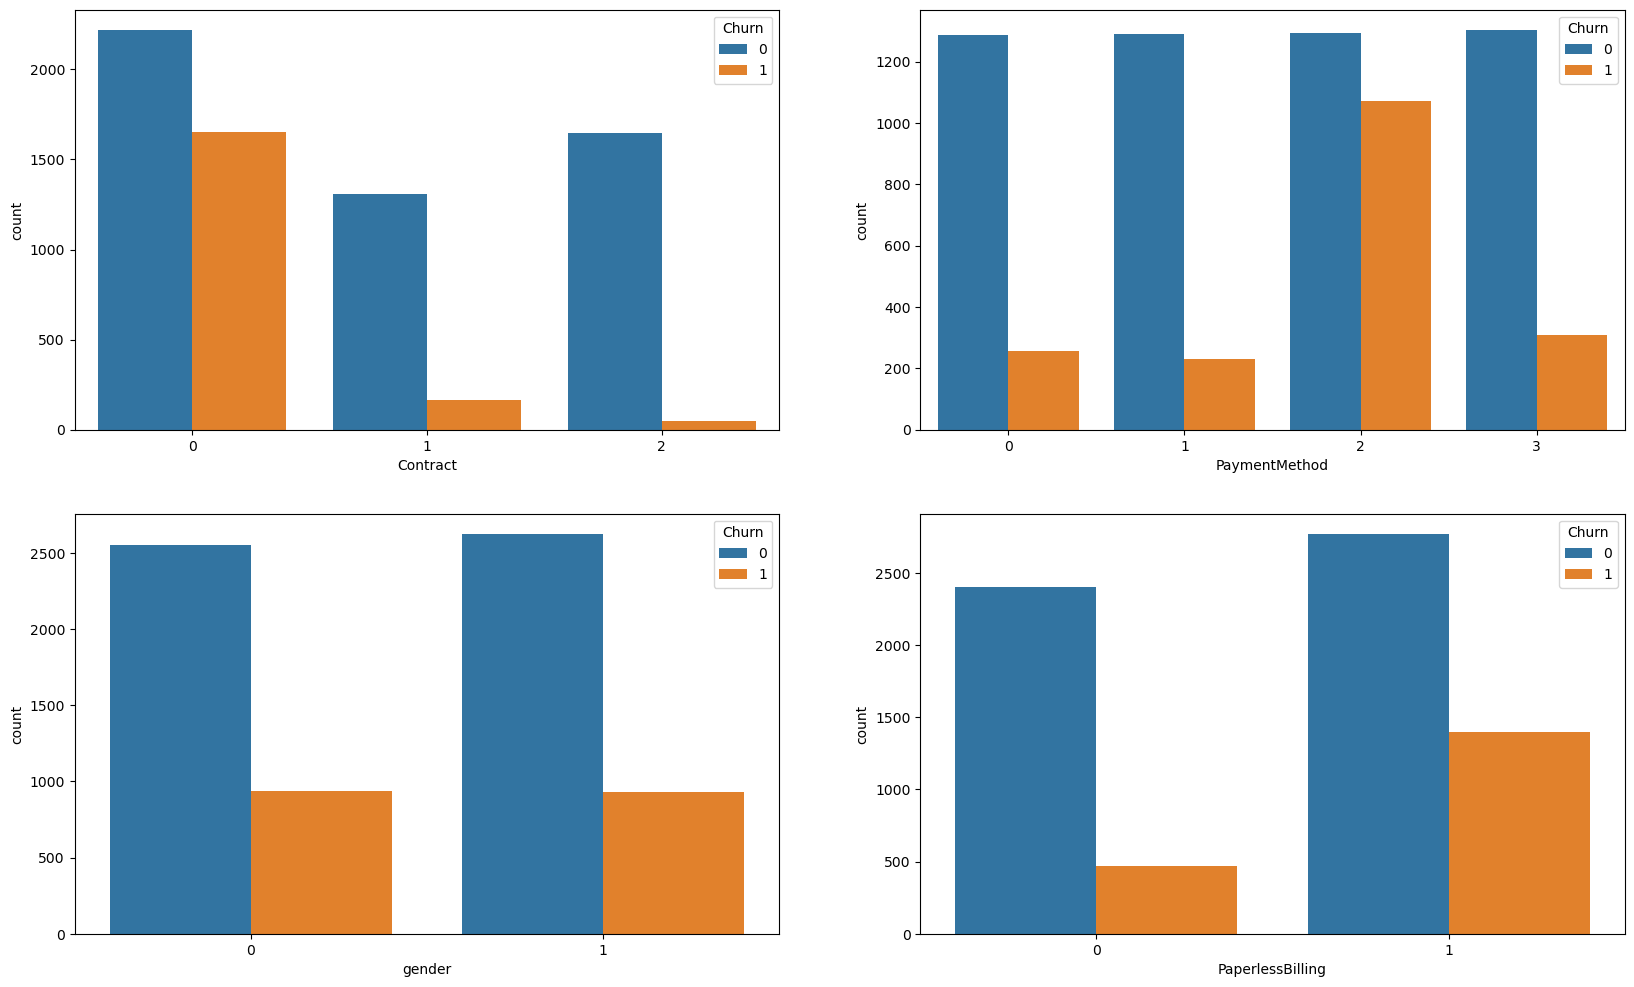

In [59]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x=d_data["Contract"], hue=label["Churn"], ax = axs[0,0])
plt2 = sns.countplot(x=d_data["PaymentMethod"], hue=label["Churn"], ax = axs[0,1])
plt3 = sns.countplot(x=d_data["gender"], hue=label["Churn"], ax = axs[1,0])
plt4 = sns.countplot(x=d_data["PaperlessBilling"], hue=label["Churn"], ax = axs[1,1])

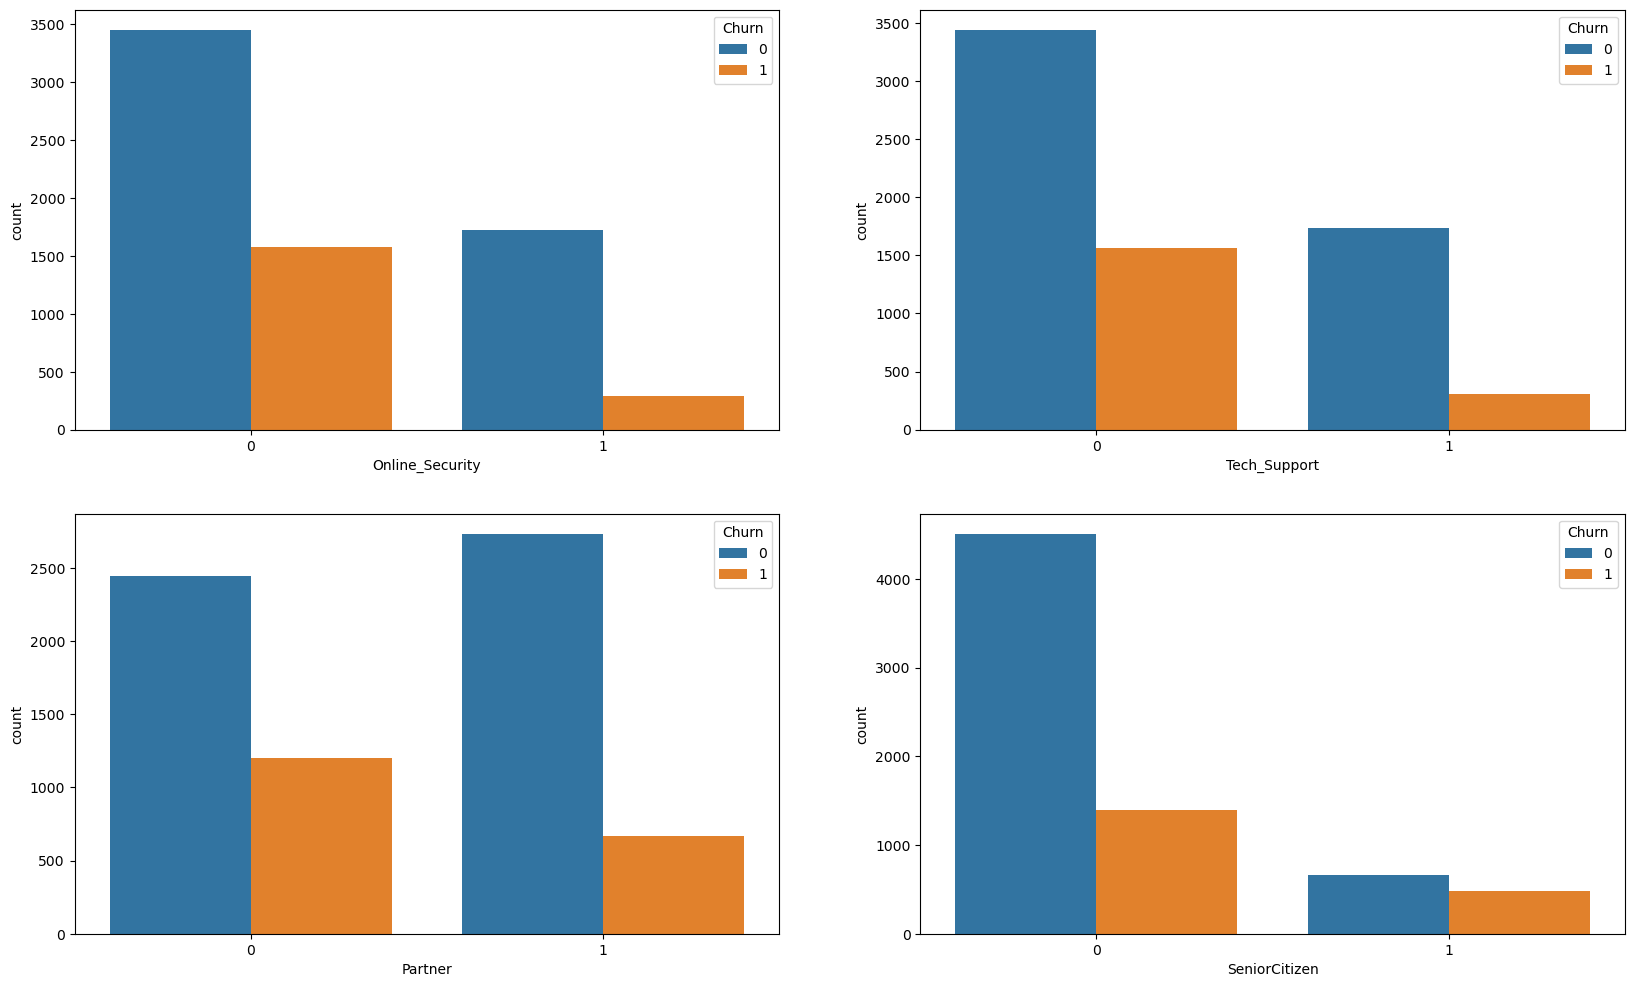

In [60]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x=d_data["Online_Security"], hue=label["Churn"], ax = axs[0,0])
plt2 = sns.countplot(x=d_data["Tech_Support"], hue=label["Churn"], ax = axs[0,1])
plt3 = sns.countplot(x=d_data["Partner"], hue=label["Churn"], ax = axs[1,0])
plt4 = sns.countplot(x=d_data["SeniorCitizen"], hue=label["Churn"], ax = axs[1,1])

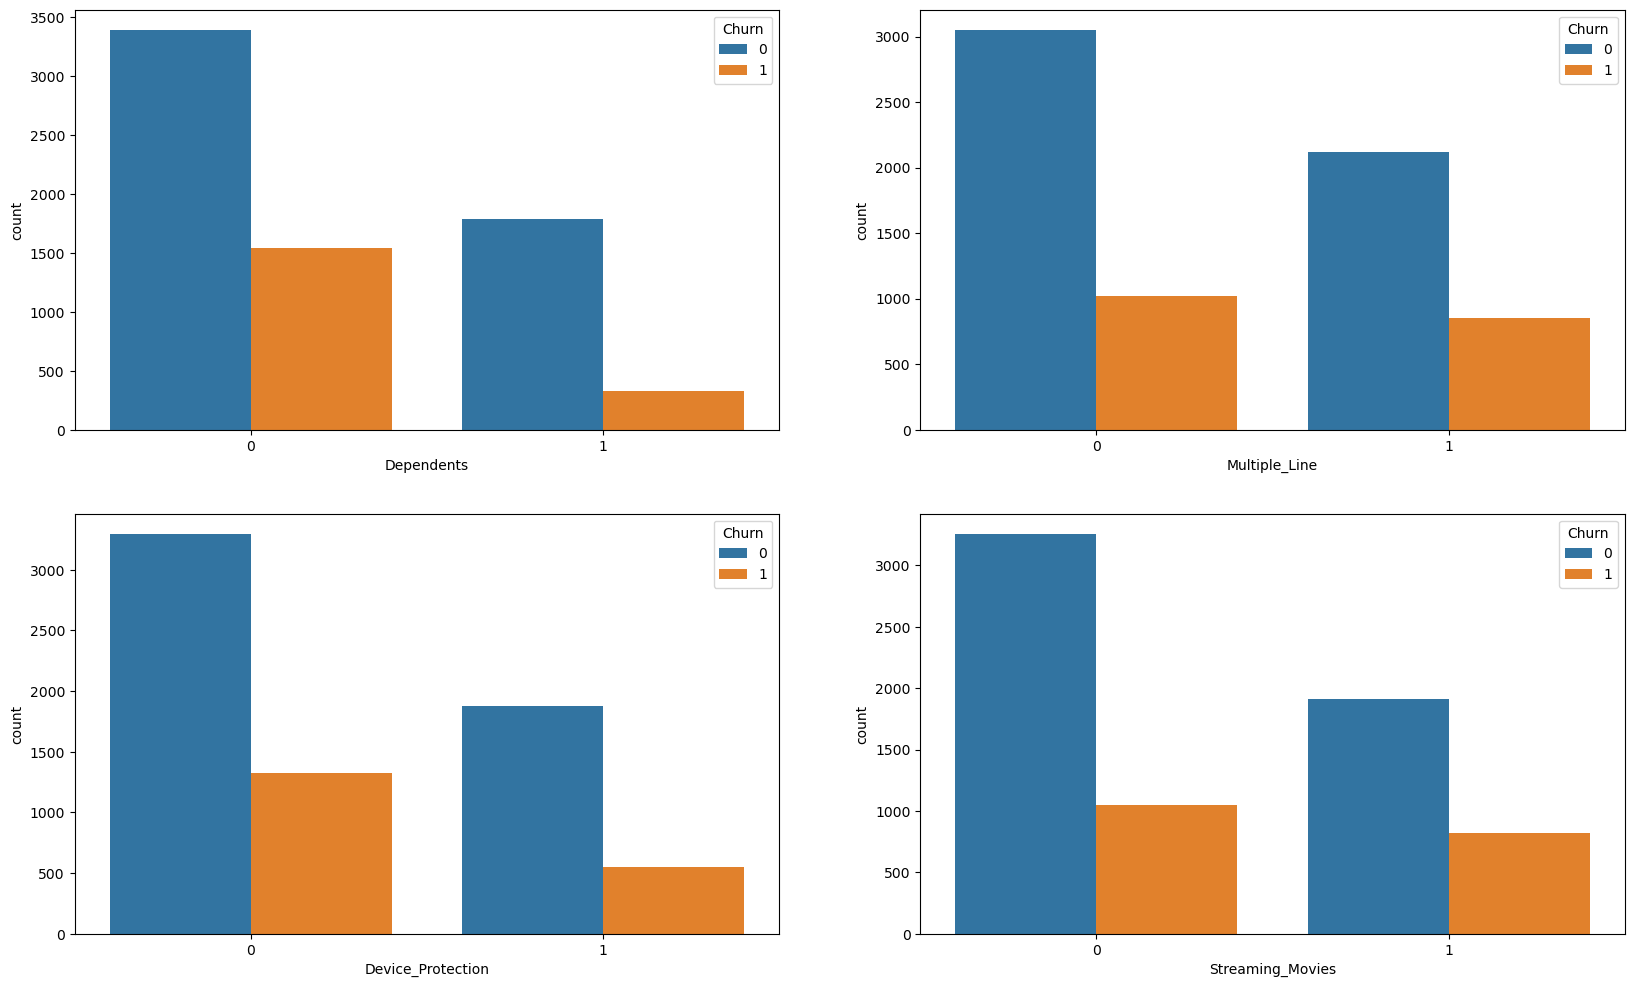

In [61]:
fig, axs = plt.subplots(2,2, figsize=(20,12))
plt1 = sns.countplot(x=d_data["Dependents"], hue=label["Churn"], ax = axs[0,0])
plt2 = sns.countplot(x=d_data["Multiple_Line"], hue=label["Churn"], ax = axs[0,1])
plt3 = sns.countplot(x=d_data["Device_Protection"], hue=label["Churn"], ax = axs[1,0])
plt4 = sns.countplot(x=d_data["Streaming_Movies"], hue=label["Churn"], ax = axs[1,1])

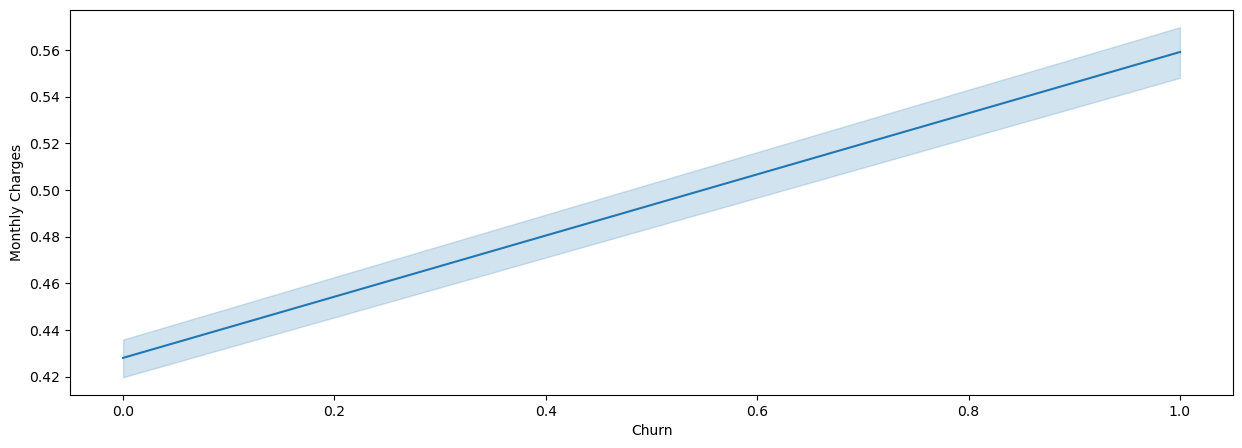

In [62]:
plt.figure(figsize=(15,5))
sns.lineplot(y=d_data["Monthly Charges"], x=label["Churn"]);

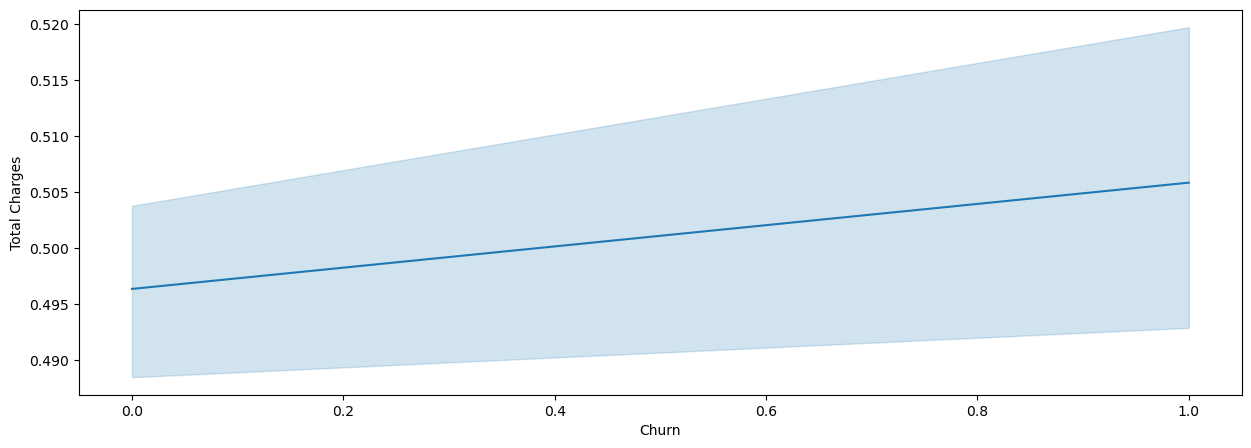

In [63]:
plt.figure(figsize=(15,5))
sns.lineplot(y=d_data["Total Charges"], x=label["Churn"]);

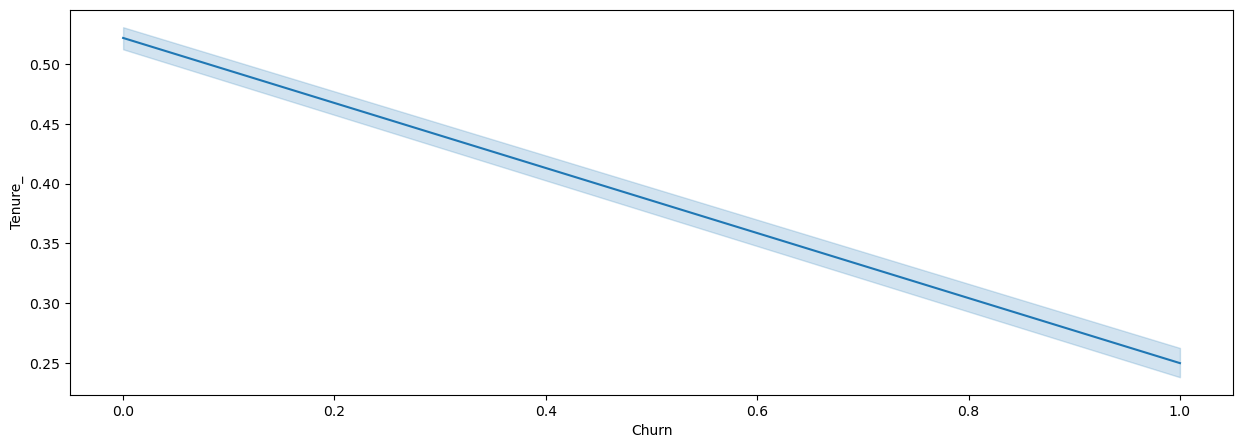

In [64]:
plt.figure(figsize=(15,5))
sns.lineplot(y=d_data["Tenure_"], x=label["Churn"]);

Text(0.5, 1.0, 'Total Number of Partners')

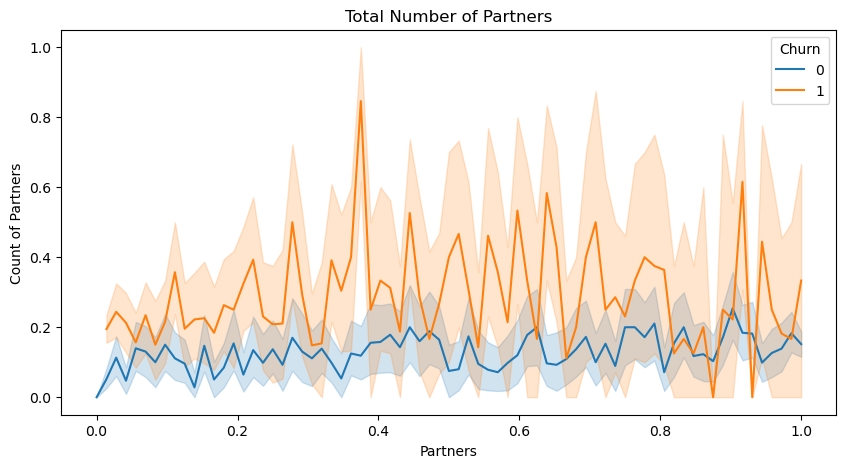

In [65]:
plt.figure(figsize = (10,5))
sns.lineplot(x=d_data["Tenure_"], y=d_data["SeniorCitizen"], hue=label["Churn"])
plt.xlabel("Partners")
plt.ylabel("Count of Partners")
plt.title("Total Number of Partners")

# Machine Learning

In [66]:
X_train, X_test, y_train, y_test =train_test_split(d_data, label, test_size=0.2, random_state=42)

In [67]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,PaymentMethod,Contract,Multiple_Line,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Tenure_,Monthly Charges,Total Charges
2142,0,0,0,1,1,0,3,1,0,1,1,0,1,0,0,1,0.291667,0.463682,0.093415
1623,0,0,0,0,1,1,0,2,1,1,0,1,0,0,1,1,0.750000,0.785572,0.661409
6074,1,0,1,0,0,1,2,0,0,1,0,0,0,0,0,0,0.013889,0.051741,0.297090
1362,1,0,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0.055556,0.516915,0.308116
6754,1,0,0,1,1,1,0,2,1,1,1,1,0,1,0,0,0.000000,0.434328,0.000000


In [68]:
y_train.head()

,Churn
2142,0
1623,0
6074,1
1362,1
6754,0


## Model building

    - Trying out 8 different learning algorith to confirm the best model

In [69]:
classifiers = [[LogisticRegression(), "Logistic Regression"],
              [RandomForestClassifier(), "Random Forest"],
               [SGDClassifier(), "SGD Classifier"],
               [XGBClassifier(), "XGB Classifier"],
               [SVC(), "SVC"],
               [GaussianNB(), "Naive Bayes"],
               [DecisionTreeClassifier(), "Decision tree"],
               [KNeighborsClassifier(), "K-Nearest Neighbours"]
              ]

print(classifiers)

[[LogisticRegression(), 'Logistic Regression'], [RandomForestClassifier(), 'Random Forest'], [SGDClassifier(), 'SGD Classifier'], [XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'XGB Classifier'], [SVC(), 'SVC'], [GaussianNB(), 'Naive Bayes'], [DecisionTreeClassifier(), 'Decision tree'],

### LogisticRegression

In [70]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8183108587650816
Precision: 0.693069306930693
Recall: 0.5630026809651475
F1-score: 0.621301775147929
AUC-ROC: 0.7366171705984038


#### Confussion Matrix

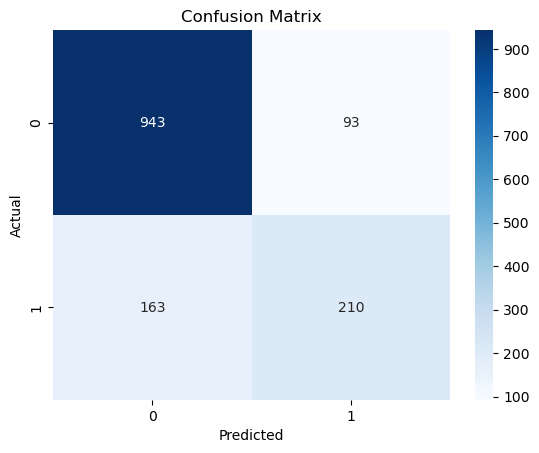

In [71]:
cm = confusion_matrix(y_test, ly_pred)

# visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap = "Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classifier

In [72]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.7920511000709723
Precision: 0.6526717557251909
Recall: 0.4584450402144772
F1-score: 0.5385826771653544
AUC-ROC: 0.6853036011883197


#### Confussion Matrix

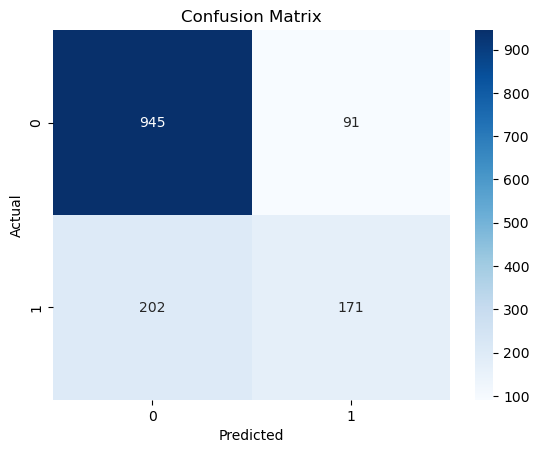

In [73]:
cm = confusion_matrix(y_test, rfy_pred)

# visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap = "Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### SGD Classifier

In [74]:
sgc = SGDClassifier()
sgc.fit(X_train, y_train)
sgy_pred = sgc.predict(X_test)
print("SGD")
print("Accuracy:", accuracy_score(y_test, sgy_pred))
print("Precision:", precision_score(y_test, sgy_pred))
print("Recall:", recall_score(y_test, sgy_pred))
print("F1-score:", f1_score(y_test, sgy_pred))
print("AUC-ROC:", roc_auc_score(y_test, sgy_pred))

SGD
Accuracy: 0.7799858055358411
Precision: 0.5674518201284796
Recall: 0.710455764075067
F1-score: 0.6309523809523809
AUC-ROC: 0.7577375345471861


#### Confussion Matrix

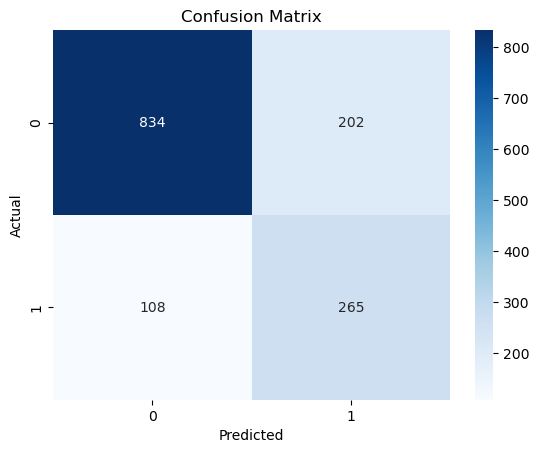

In [75]:
cm = confusion_matrix(y_test, sgy_pred)

# visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap = "Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### XGB Classifier

In [76]:
xgc = XGBClassifier()
xgc.fit(X_train, y_train)
xgy_pred = xgc.predict(X_test)
print("SGD")
print("Accuracy:", accuracy_score(y_test, xgy_pred))
print("Precision:", precision_score(y_test, xgy_pred))
print("Recall:", recall_score(y_test, xgy_pred))
print("F1-score:", f1_score(y_test, xgy_pred))
print("AUC-ROC:", roc_auc_score(y_test, xgy_pred))

SGD
Accuracy: 0.7892122072391767
Precision: 0.6210191082802548
Recall: 0.5227882037533512
F1-score: 0.5676855895196508
AUC-ROC: 0.7039616694442432


#### Confussion Matrix

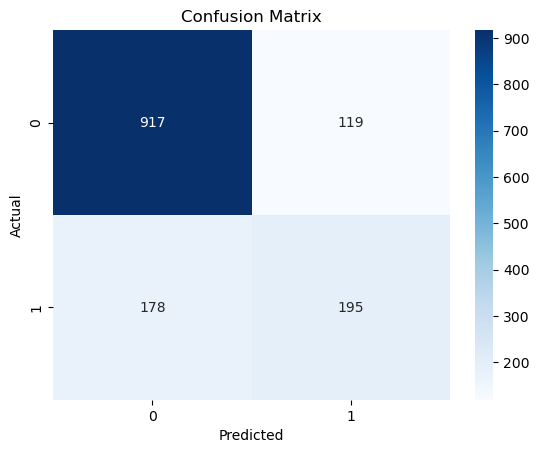

In [77]:
cm = confusion_matrix(y_test, xgy_pred)

# visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap = "Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### SVC Classifier

In [78]:
svc = SVC()
svc.fit(X_train, y_train)
svy_pred = svc.predict(X_test)
print("SGD")
print("Accuracy:", accuracy_score(y_test, svy_pred))
print("Precision:", precision_score(y_test, svy_pred))
print("Recall:", recall_score(y_test, svy_pred))
print("F1-score:", f1_score(y_test, svy_pred))
print("AUC-ROC:", roc_auc_score(y_test, svy_pred))

SGD
Accuracy: 0.801277501774308
Precision: 0.662020905923345
Recall: 0.5093833780160858
F1-score: 0.5757575757575758
AUC-ROC: 0.707877017193371


#### Confussion Matrix

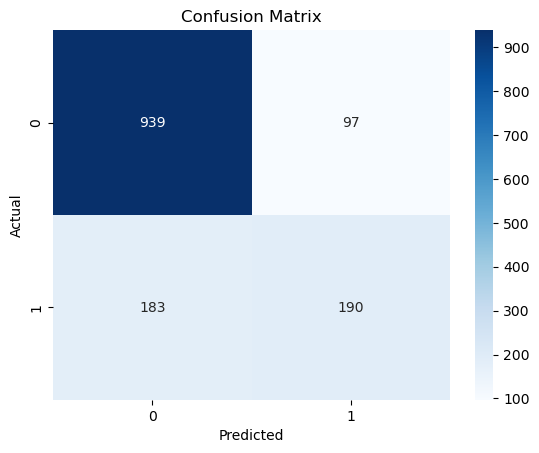

In [79]:
cm = confusion_matrix(y_test, svy_pred)

# visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap = "Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Naive Bayes

In [80]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)
nby_pred = nbc.predict(X_test)
print("SGD")
print("Accuracy:", accuracy_score(y_test, nby_pred))
print("Precision:", precision_score(y_test, nby_pred))
print("Recall:", recall_score(y_test, nby_pred))
print("F1-score:", f1_score(y_test, nby_pred))
print("AUC-ROC:", roc_auc_score(y_test, nby_pred))

SGD
Accuracy: 0.7480482611781405
Precision: 0.5158450704225352
Recall: 0.7855227882037533
F1-score: 0.6227417640807651
AUC-ROC: 0.760039386379869


#### Confussion Matrix

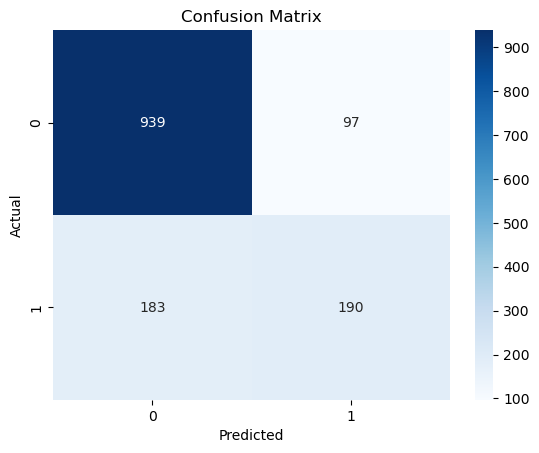

In [81]:
cm = confusion_matrix(y_test, svy_pred)

# visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap = "Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### DecisionTreeClassifier

In [82]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dty_pred = dtc.predict(X_test)
print("SGD")
print("Accuracy:", accuracy_score(y_test, dty_pred))
print("Precision:", precision_score(y_test, dty_pred))
print("Recall:", recall_score(y_test, dty_pred))
print("F1-score:", f1_score(y_test, dty_pred))
print("AUC-ROC:", roc_auc_score(y_test, dty_pred))

SGD
Accuracy: 0.730305180979418
Precision: 0.49014084507042255
Recall: 0.46648793565683644
F1-score: 0.478021978021978
AUC-ROC: 0.6458887554732058


#### Confussion Matrix

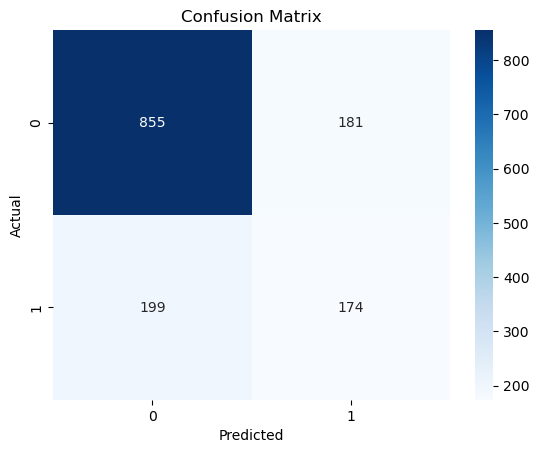

In [83]:
cm = confusion_matrix(y_test, dty_pred)

# visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap = "Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Productionizing and Serializing

    - Logistic Regression is the best performing model with:
        Accuracy: 0.8168914123491838
        Precision: 0.6910299003322259
        Recall: 0.5576407506702413
        F1-score: 0.6172106824925817
        AUC-ROC: 0.7339362054509507
    
    - This best performing model is serialized using:
        joblib
        

In [84]:
#Productionizing the best performing model
# Serializing the best model for subsequent and easy usage
import joblib

# Save the model as a pickle file
filename = "./optimized_mod.pkl"
joblib.dump(logreg, filename)

['./optimized_mod.pkl']